In [20]:
!pip install ultralytics

In [21]:
import os
import yaml
from ultralytics import YOLO
from IPython.display import display, Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
model=YOLO("yolo26s.pt")

In [23]:
listdir1=os.listdir("/kaggle/input/african-wildlife")
listdir1

['buffalo', 'elephant', 'zebra', 'rhino']

In [24]:
image = []
label = []

for i in listdir1:
    path1 = os.path.join("/kaggle/input/african-wildlife", i)
    
    all_files = sorted(os.listdir(path1)) 
    
    for file in all_files:
        path_full = os.path.join(path1, file)
        if file.lower().endswith(".jpg"):
            image.append(path_full)
        elif file.lower().endswith(".txt"):
            label.append(path_full)


df = pd.DataFrame({"image": image, "label": label})

In [25]:
len(image),len(label)

(1504, 1504)

In [26]:
image[0:5]

['/kaggle/input/african-wildlife/buffalo/001.jpg',
 '/kaggle/input/african-wildlife/buffalo/002.jpg',
 '/kaggle/input/african-wildlife/buffalo/003.jpg',
 '/kaggle/input/african-wildlife/buffalo/004.jpg',
 '/kaggle/input/african-wildlife/buffalo/005.jpg']

In [27]:
label[0:5]

['/kaggle/input/african-wildlife/buffalo/001.txt',
 '/kaggle/input/african-wildlife/buffalo/002.txt',
 '/kaggle/input/african-wildlife/buffalo/003.txt',
 '/kaggle/input/african-wildlife/buffalo/004.txt',
 '/kaggle/input/african-wildlife/buffalo/005.txt']

In [28]:
x=df['image']
y=df['label']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True)

In [30]:
x_train,y_train

(1058       /kaggle/input/african-wildlife/zebra/311.jpg
 408     /kaggle/input/african-wildlife/elephant/033.jpg
 703     /kaggle/input/african-wildlife/elephant/329.jpg
 1279       /kaggle/input/african-wildlife/rhino/156.jpg
 140      /kaggle/input/african-wildlife/buffalo/141.jpg
                              ...                       
 763        /kaggle/input/african-wildlife/zebra/012.jpg
 835        /kaggle/input/african-wildlife/zebra/085.jpg
 1216       /kaggle/input/african-wildlife/rhino/090.jpg
 559     /kaggle/input/african-wildlife/elephant/184.jpg
 684     /kaggle/input/african-wildlife/elephant/309.jpg
 Name: image, Length: 1203, dtype: object,
 1058       /kaggle/input/african-wildlife/zebra/311.txt
 408     /kaggle/input/african-wildlife/elephant/033.txt
 703     /kaggle/input/african-wildlife/elephant/329.txt
 1279       /kaggle/input/african-wildlife/rhino/156.txt
 140      /kaggle/input/african-wildlife/buffalo/141.txt
                              ...            

In [31]:
os.makedirs("data",exist_ok=True)

In [32]:
os.makedirs("/kaggle/working/data/train/images",exist_ok=True)
os.makedirs("/kaggle/working/data/train/labels",exist_ok=True)
os.makedirs("/kaggle/working/data/test/images",exist_ok=True)
os.makedirs("/kaggle/working/data/test/labels",exist_ok=True)


In [33]:
import shutil


for img, lbl in zip(x_train, y_train):
    shutil.copy(img, "/kaggle/working/data/train/images")
    shutil.copy(lbl, "/kaggle/working/data/train/labels")


for img, lbl in zip(x_test, y_test):
    shutil.copy(img, "/kaggle/working/data/test/images")
    shutil.copy(lbl, "/kaggle/working/data/test/labels")



In [34]:
data_yaml = {
    'path': '/kaggle/working/data',
    'train': 'train/images',
    'val': 'test/images', 
    'nc': 4,
    'names': ['buffalo', 'elephant', 'rhino', 'zebra']
}

with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

In [35]:
model.train(data='/kaggle/working/data.yaml', epochs=1000, imgsz=640,task="detect",patience=10,batch=15)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=15, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=1000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc312958620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [36]:
import glob

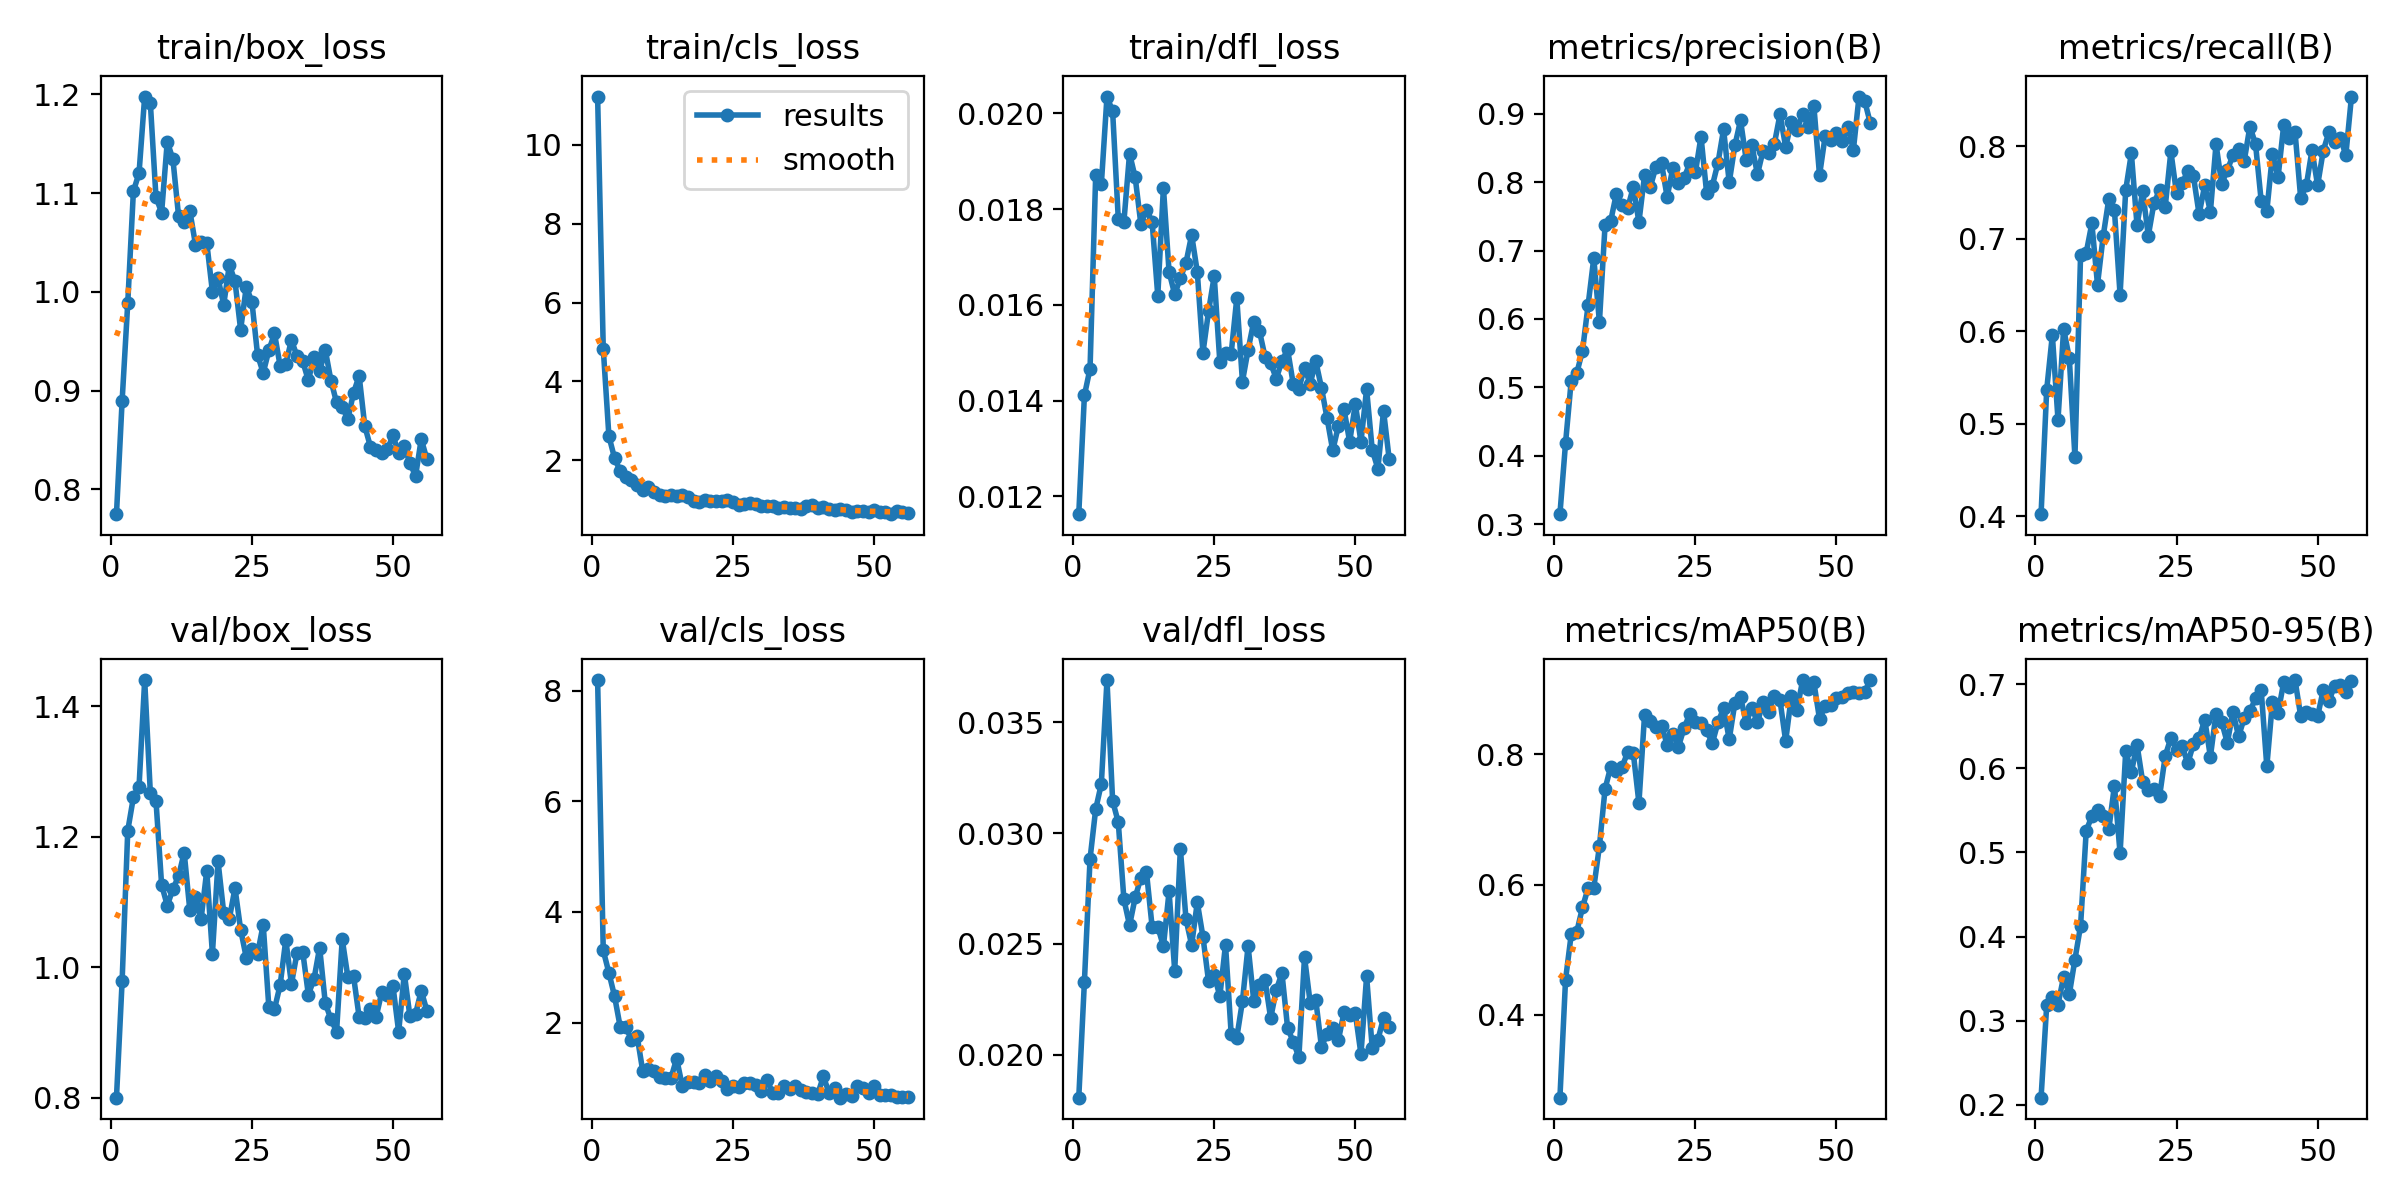

None


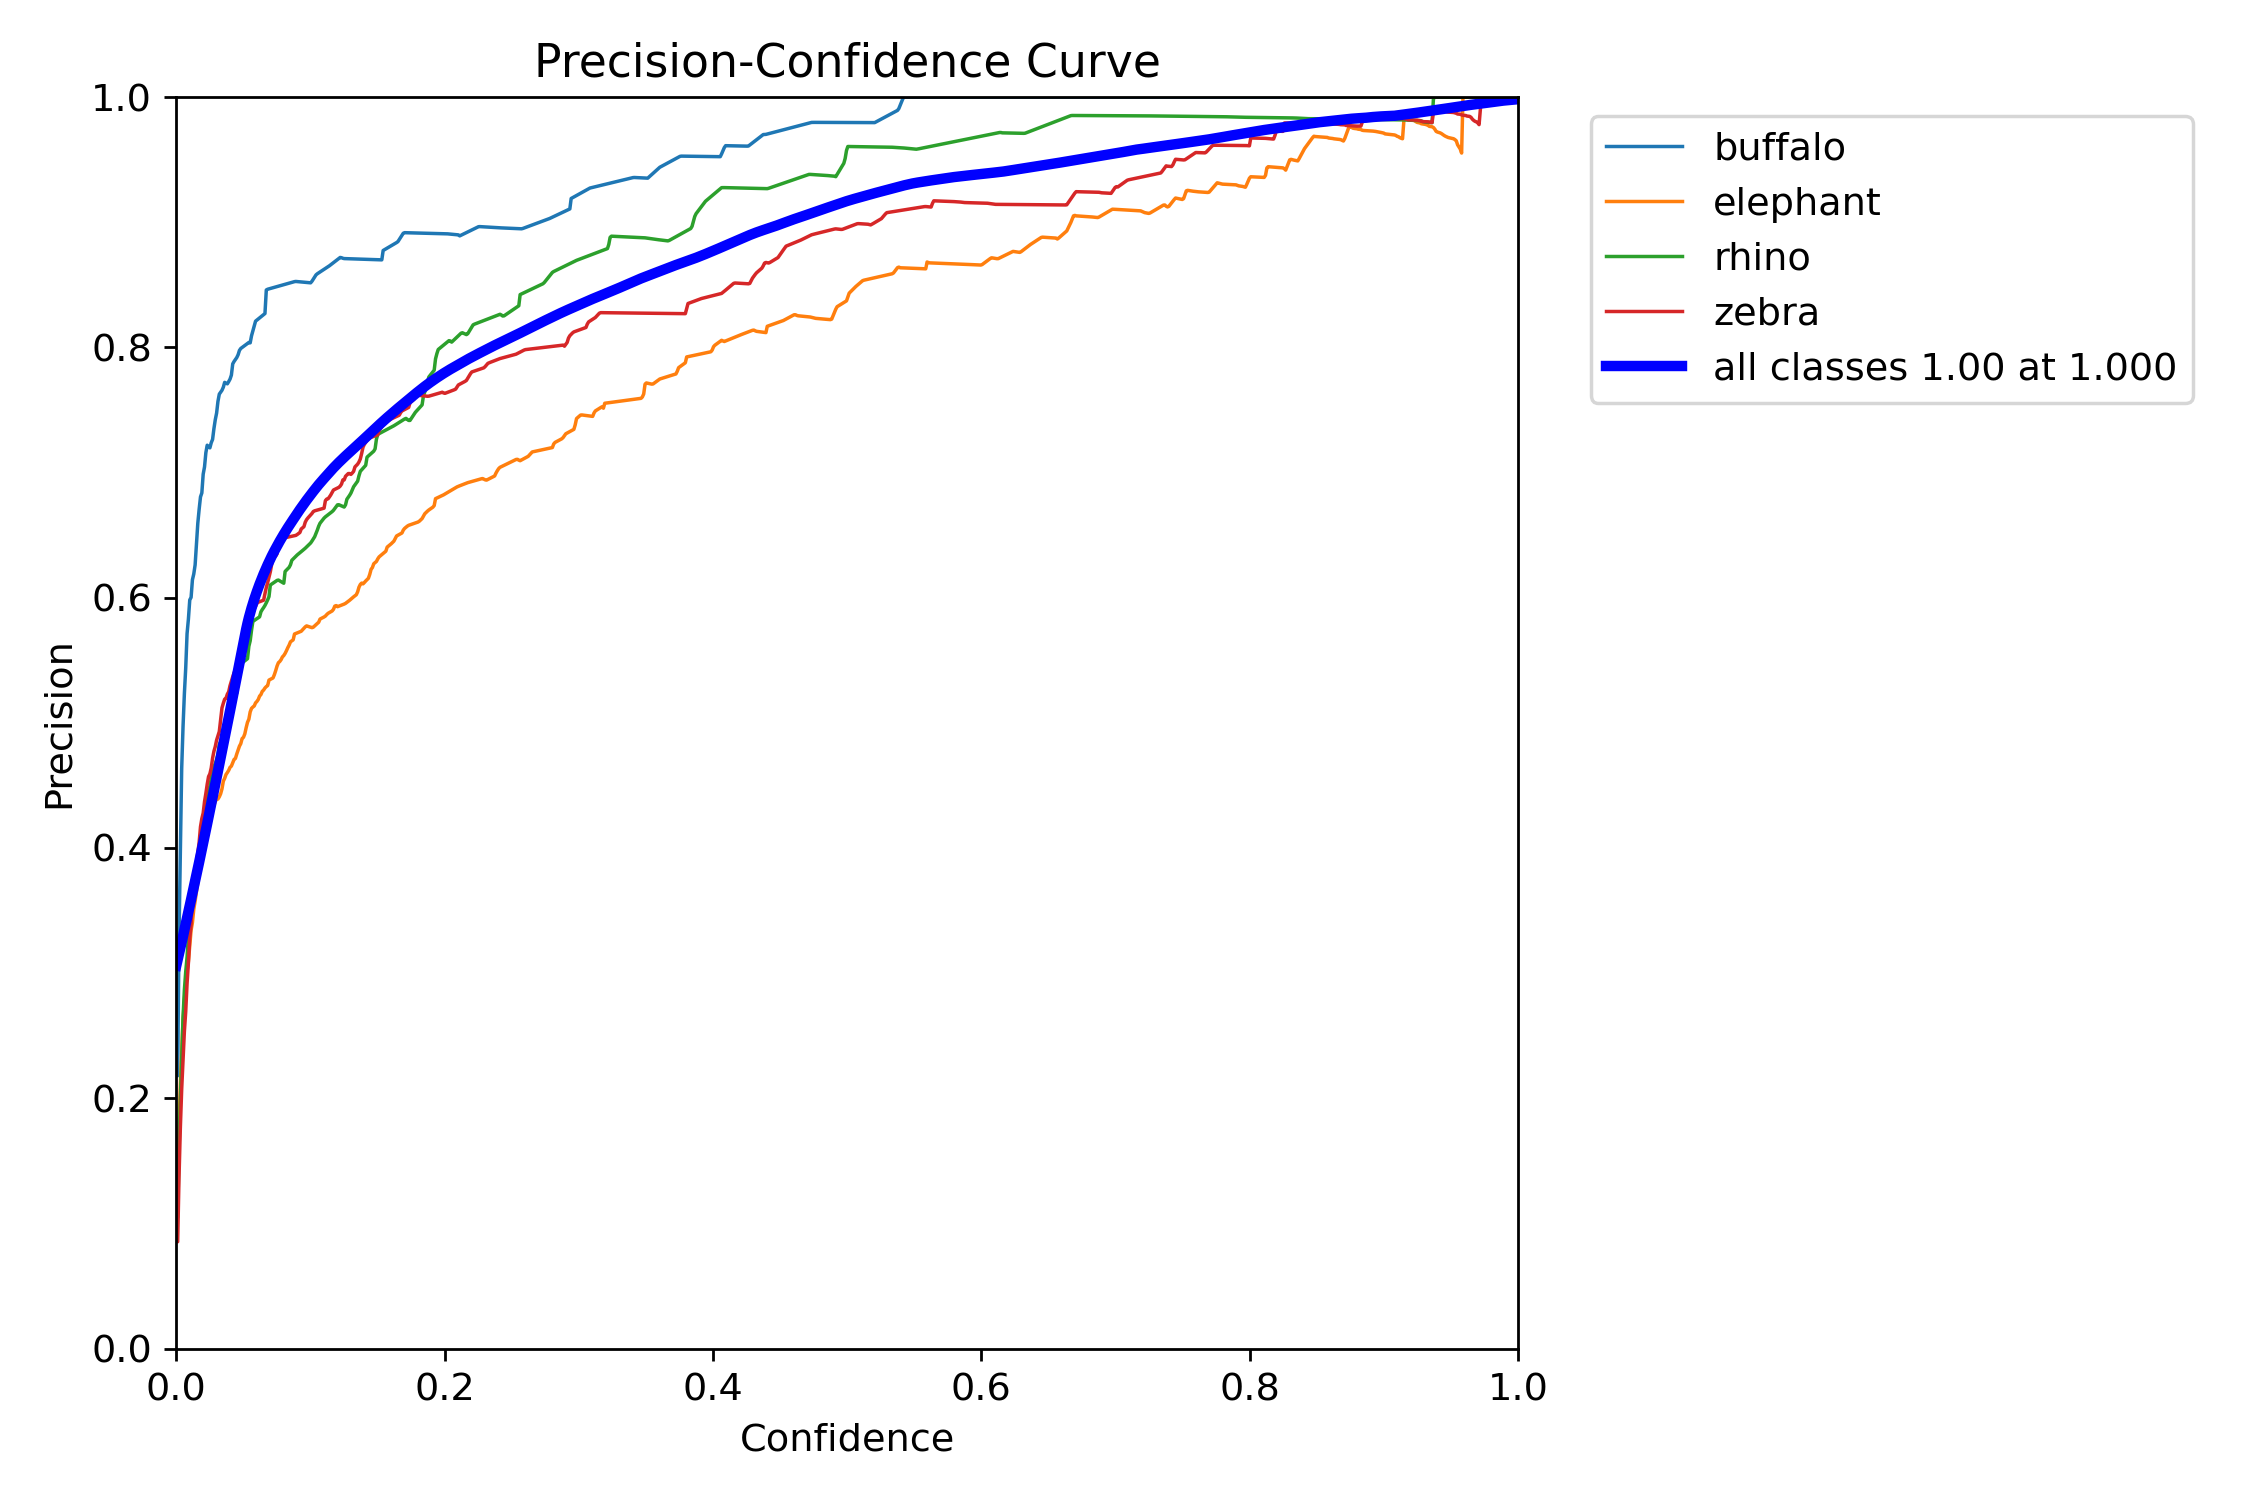

None


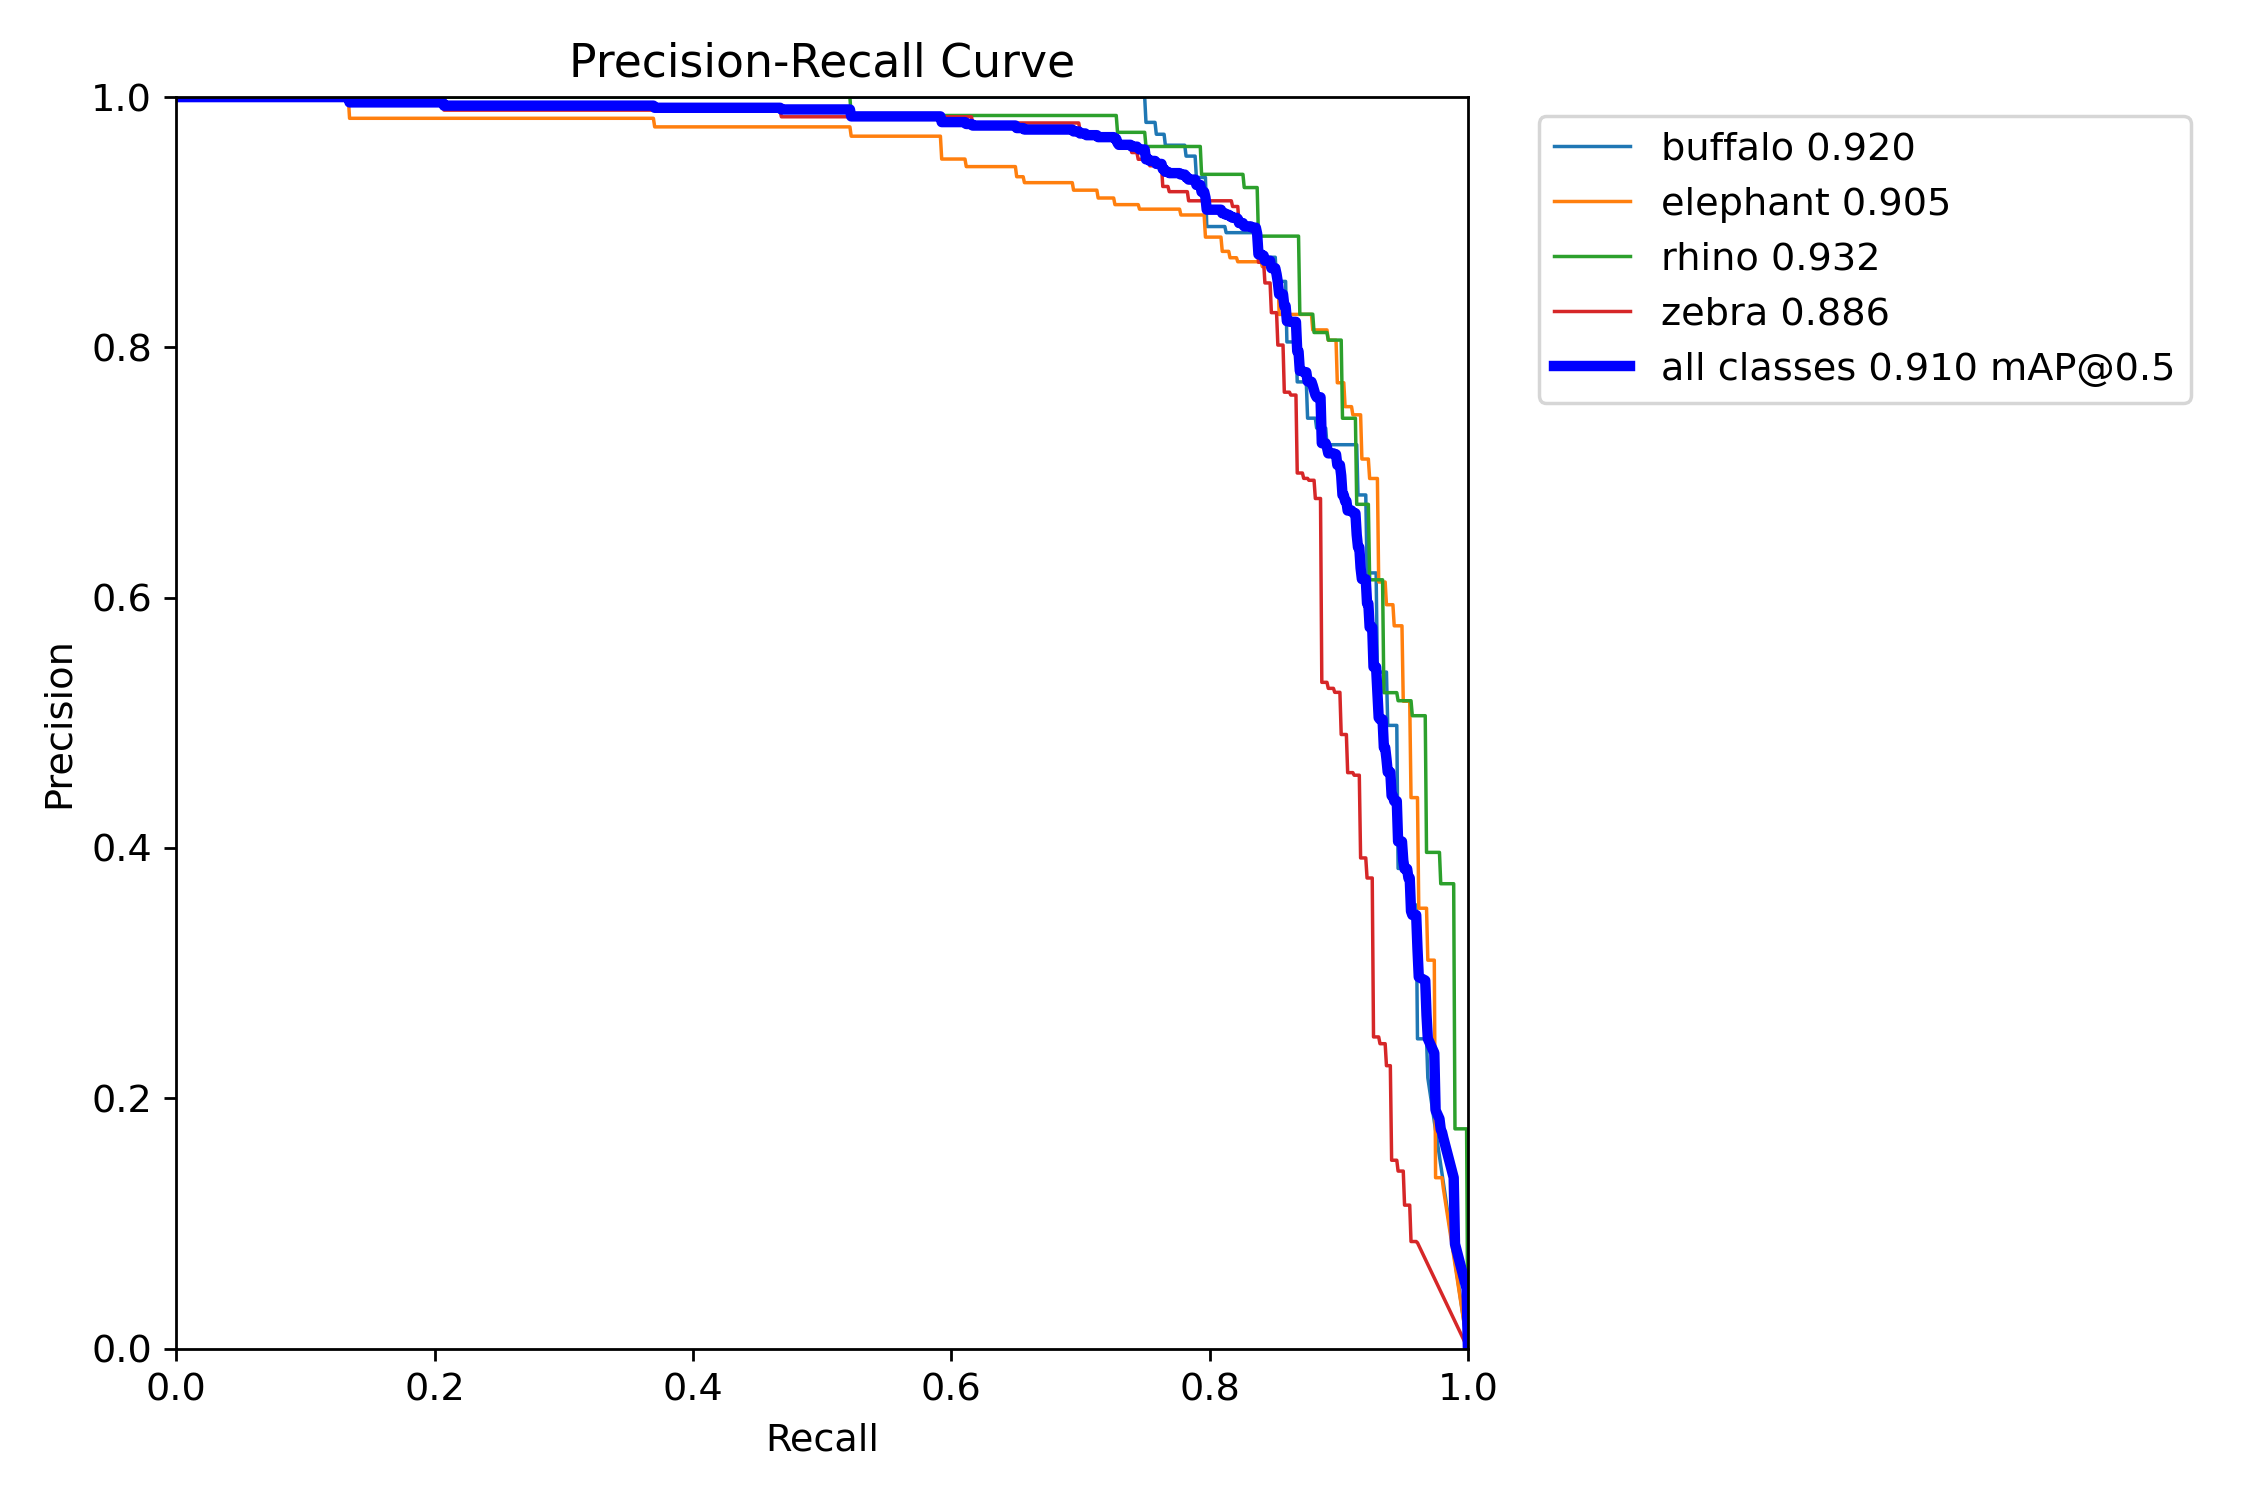

None


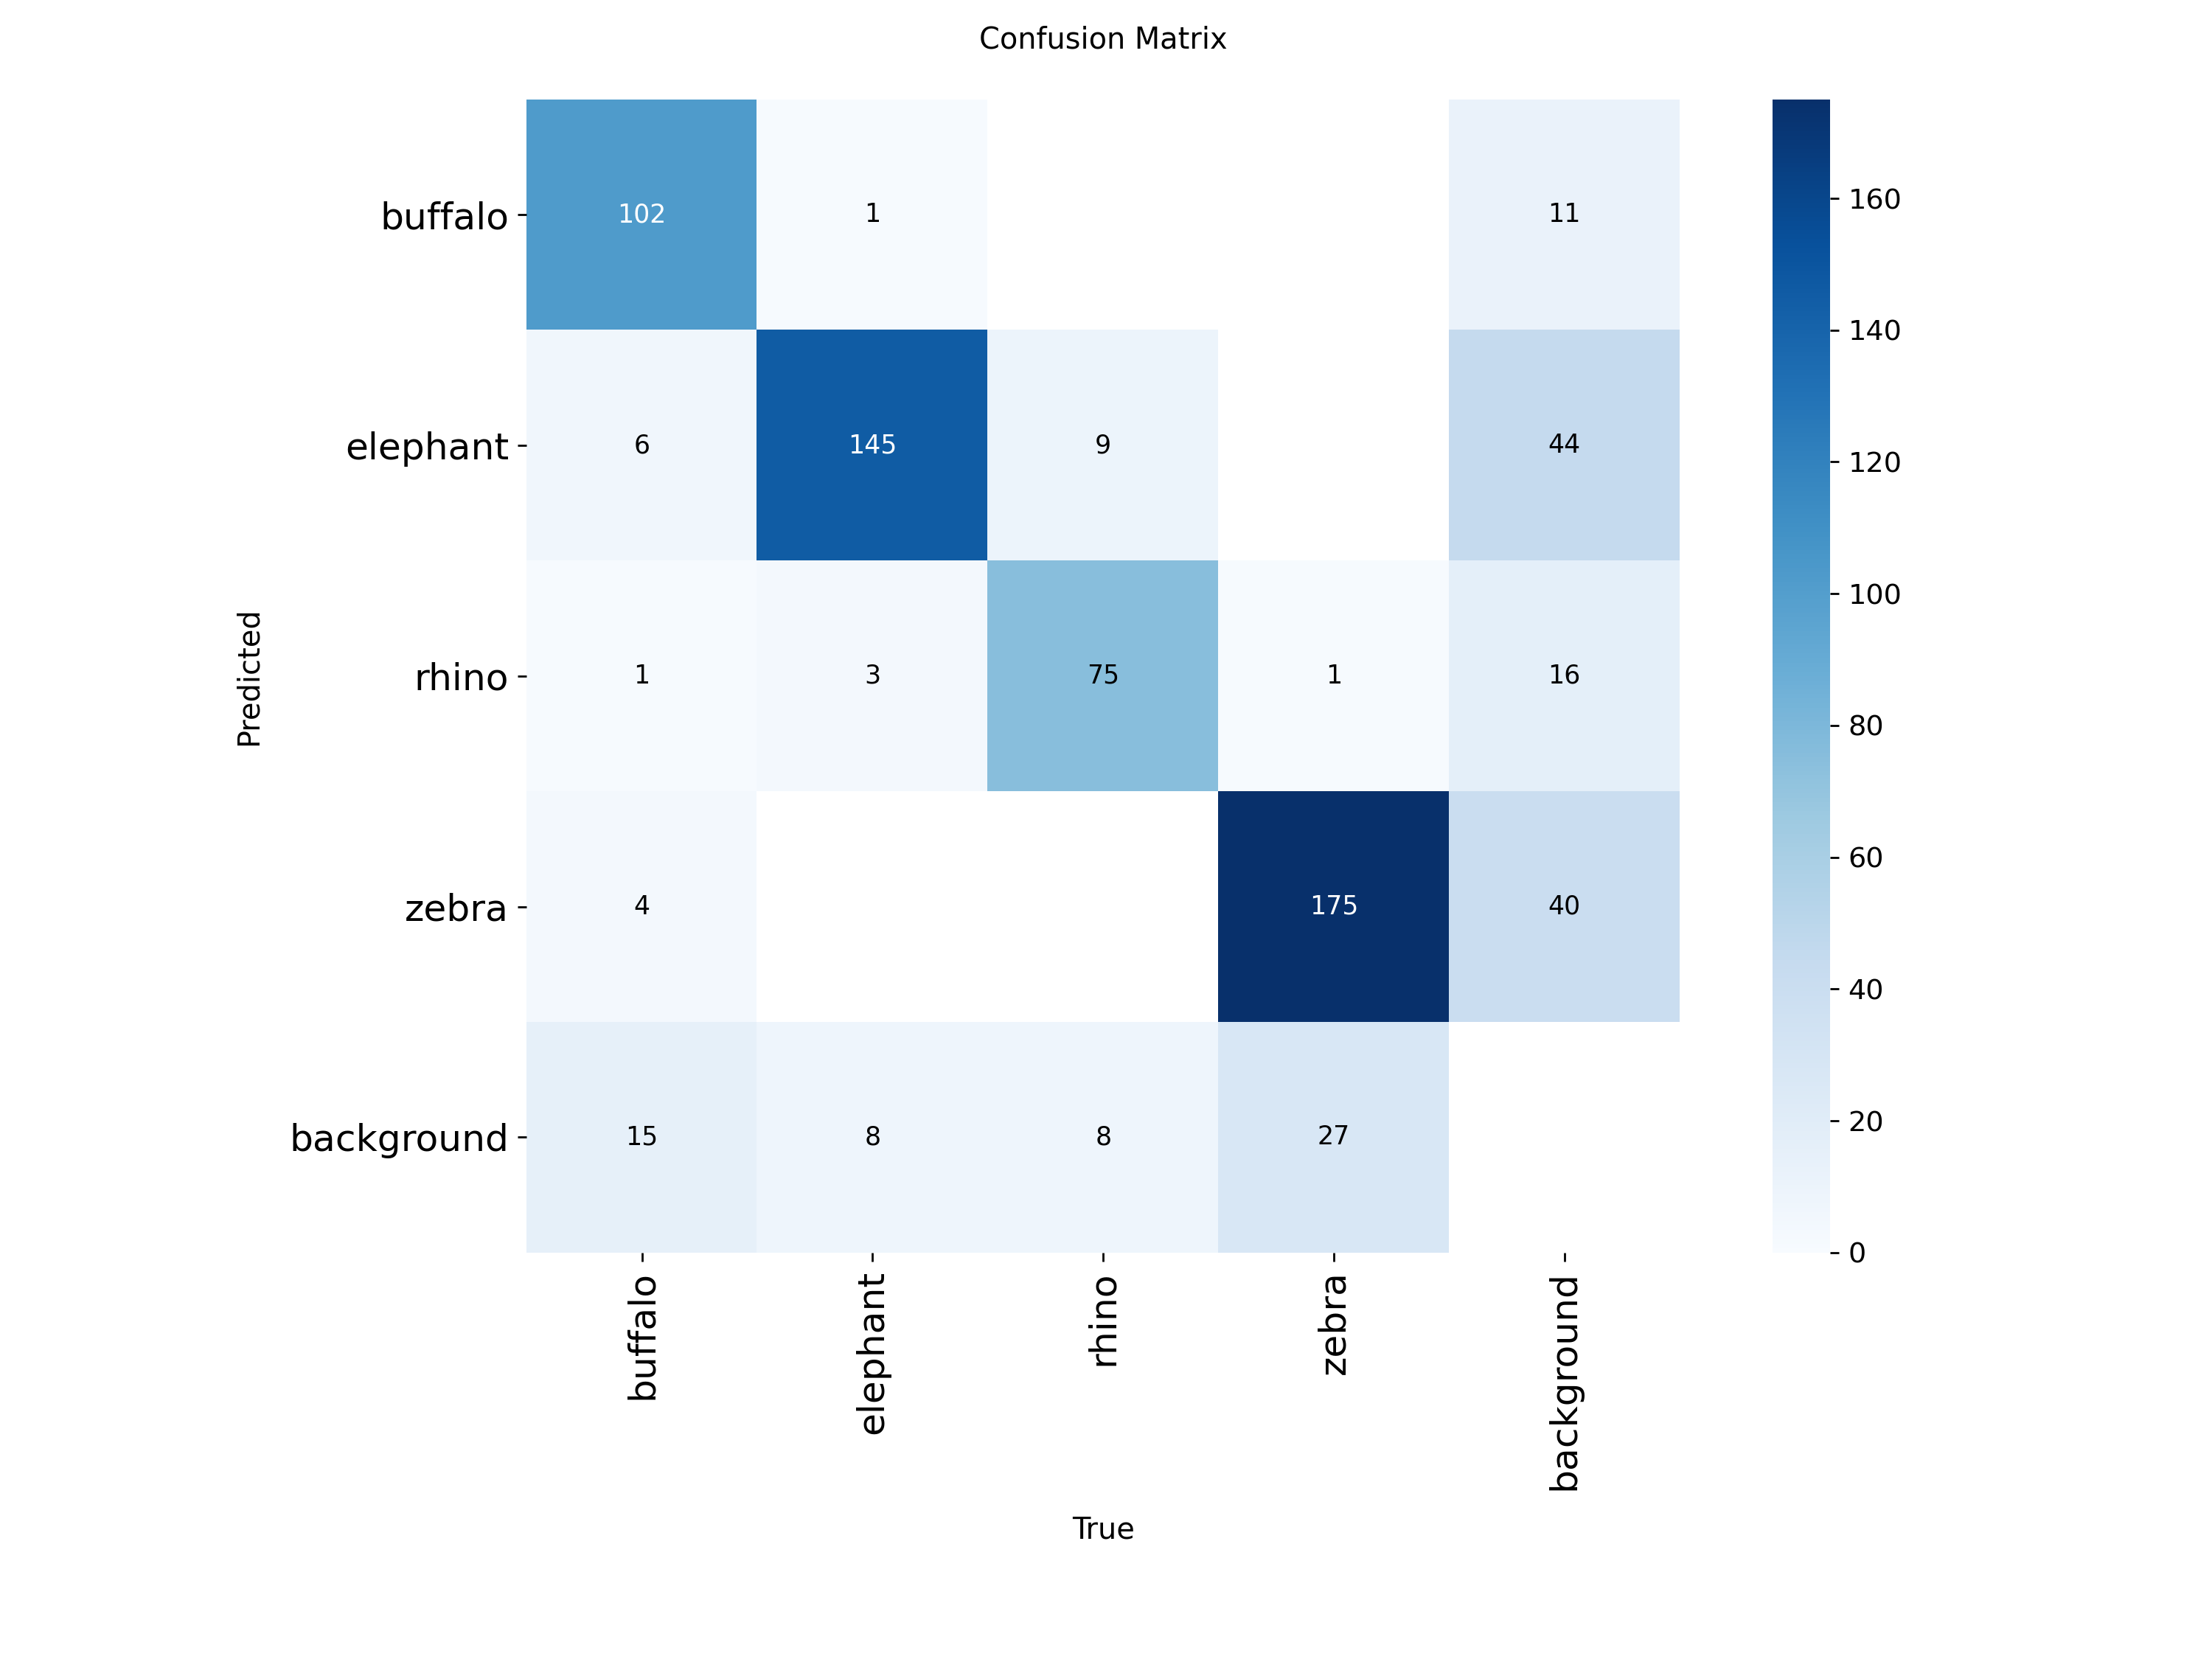

None


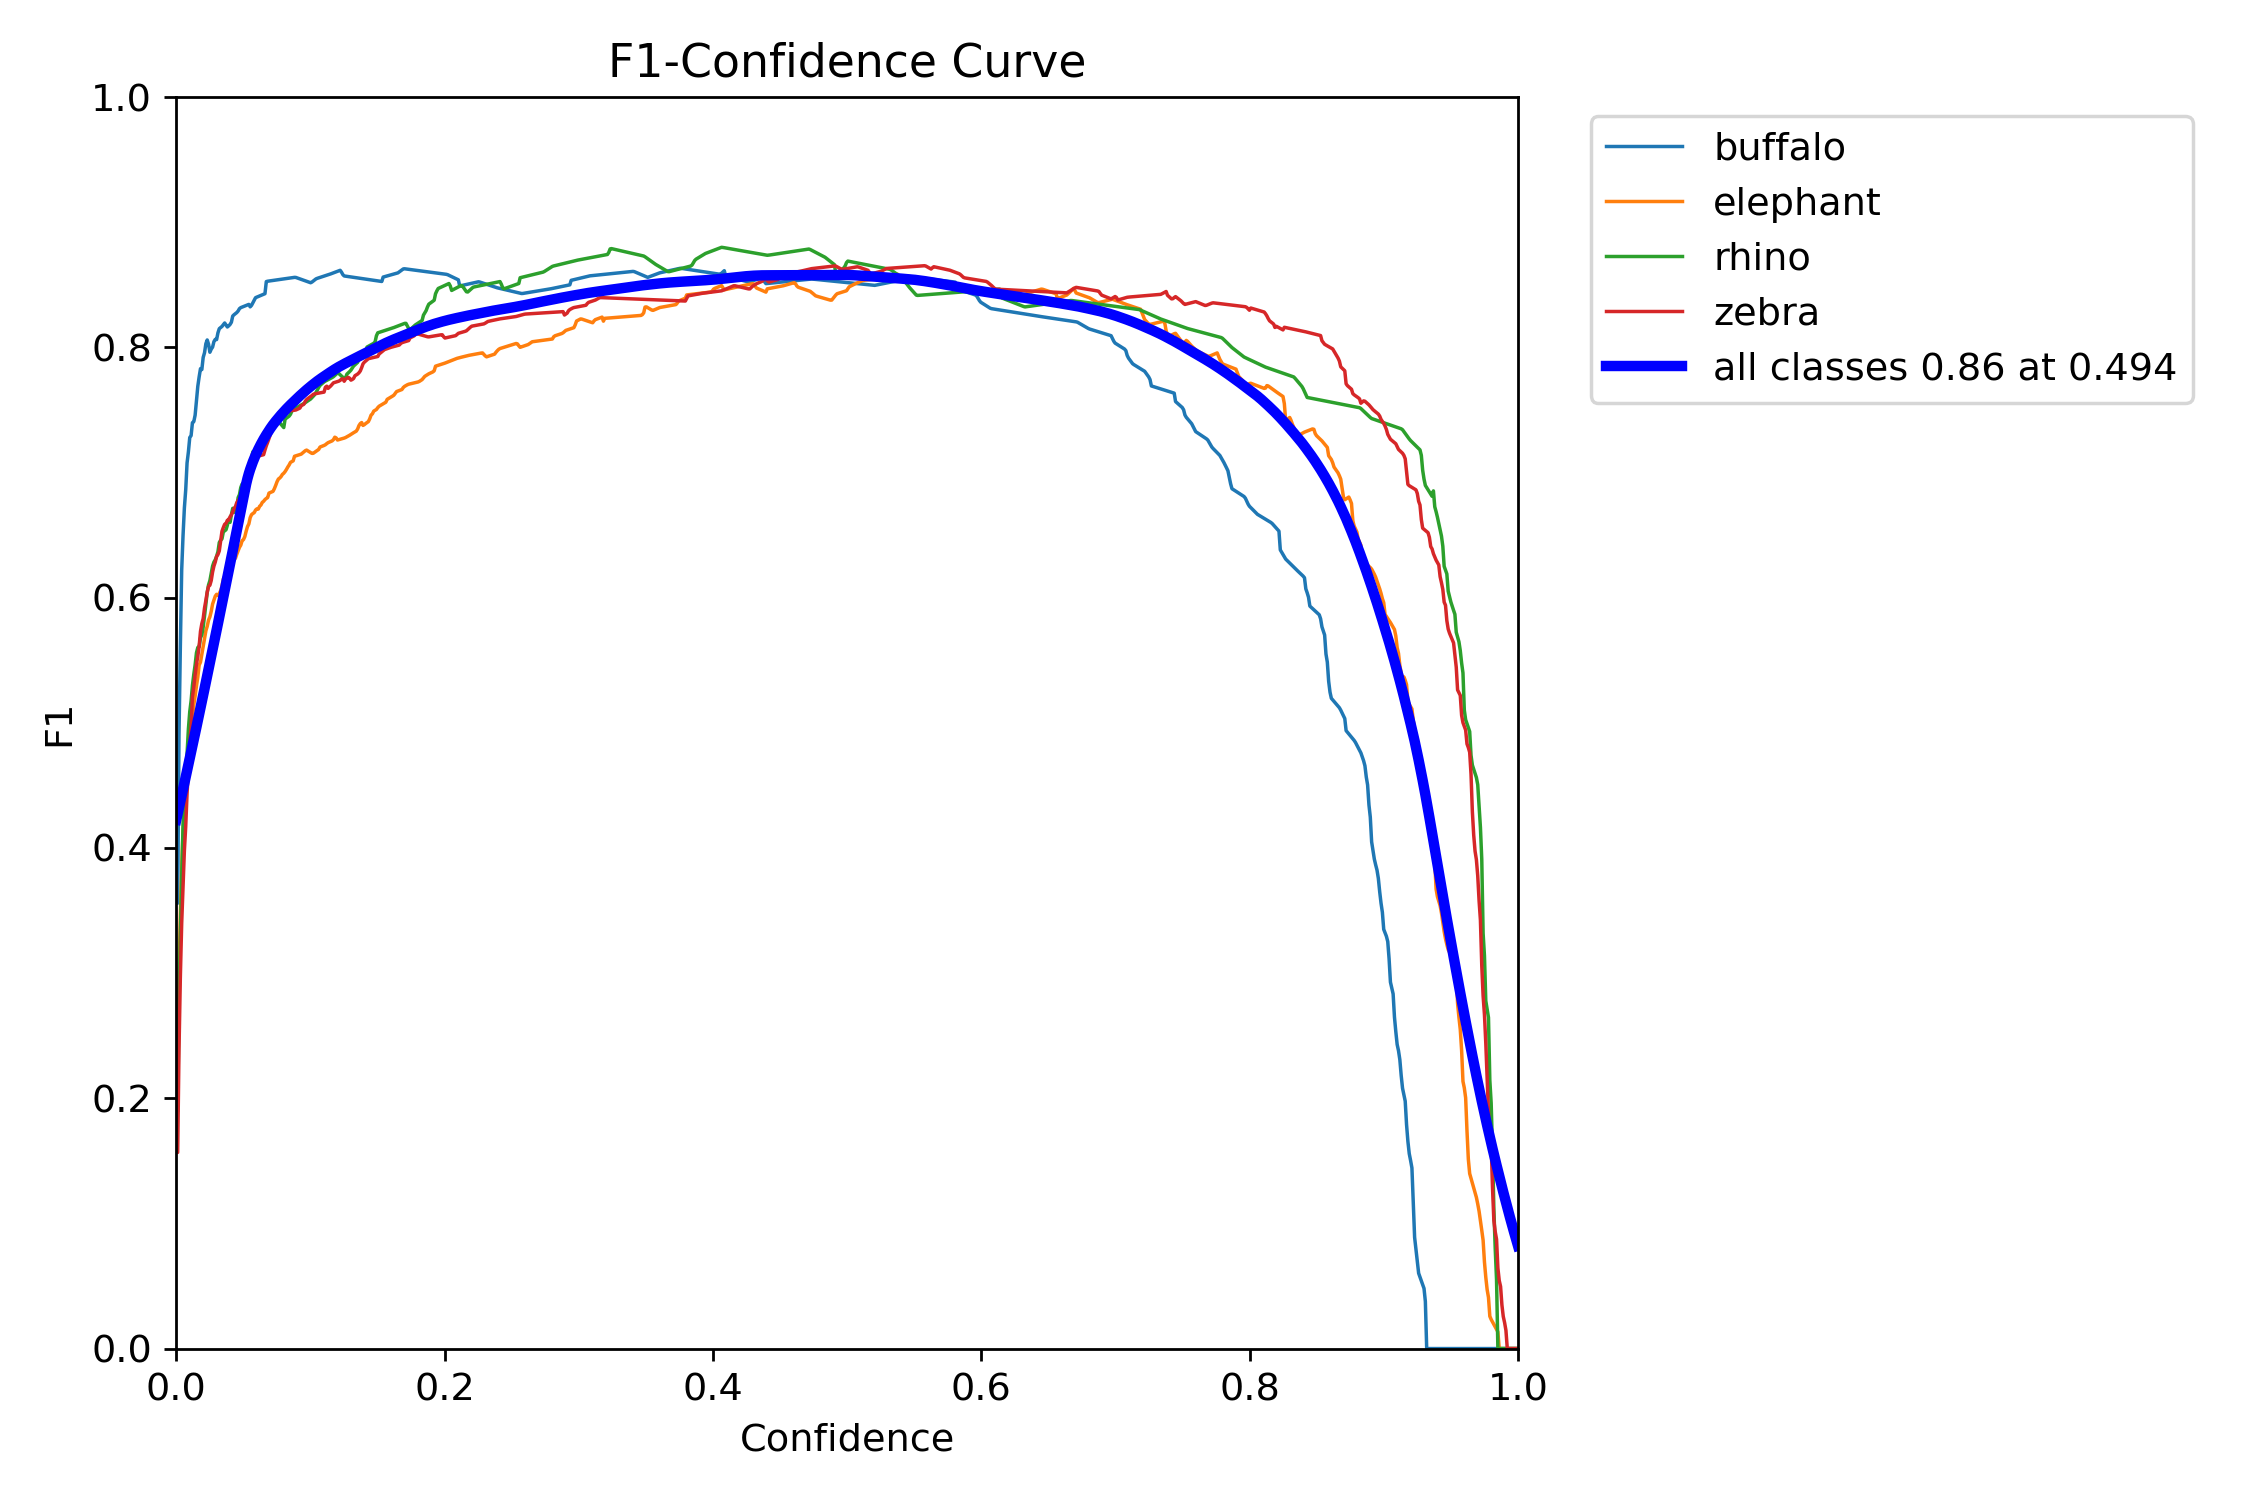

None


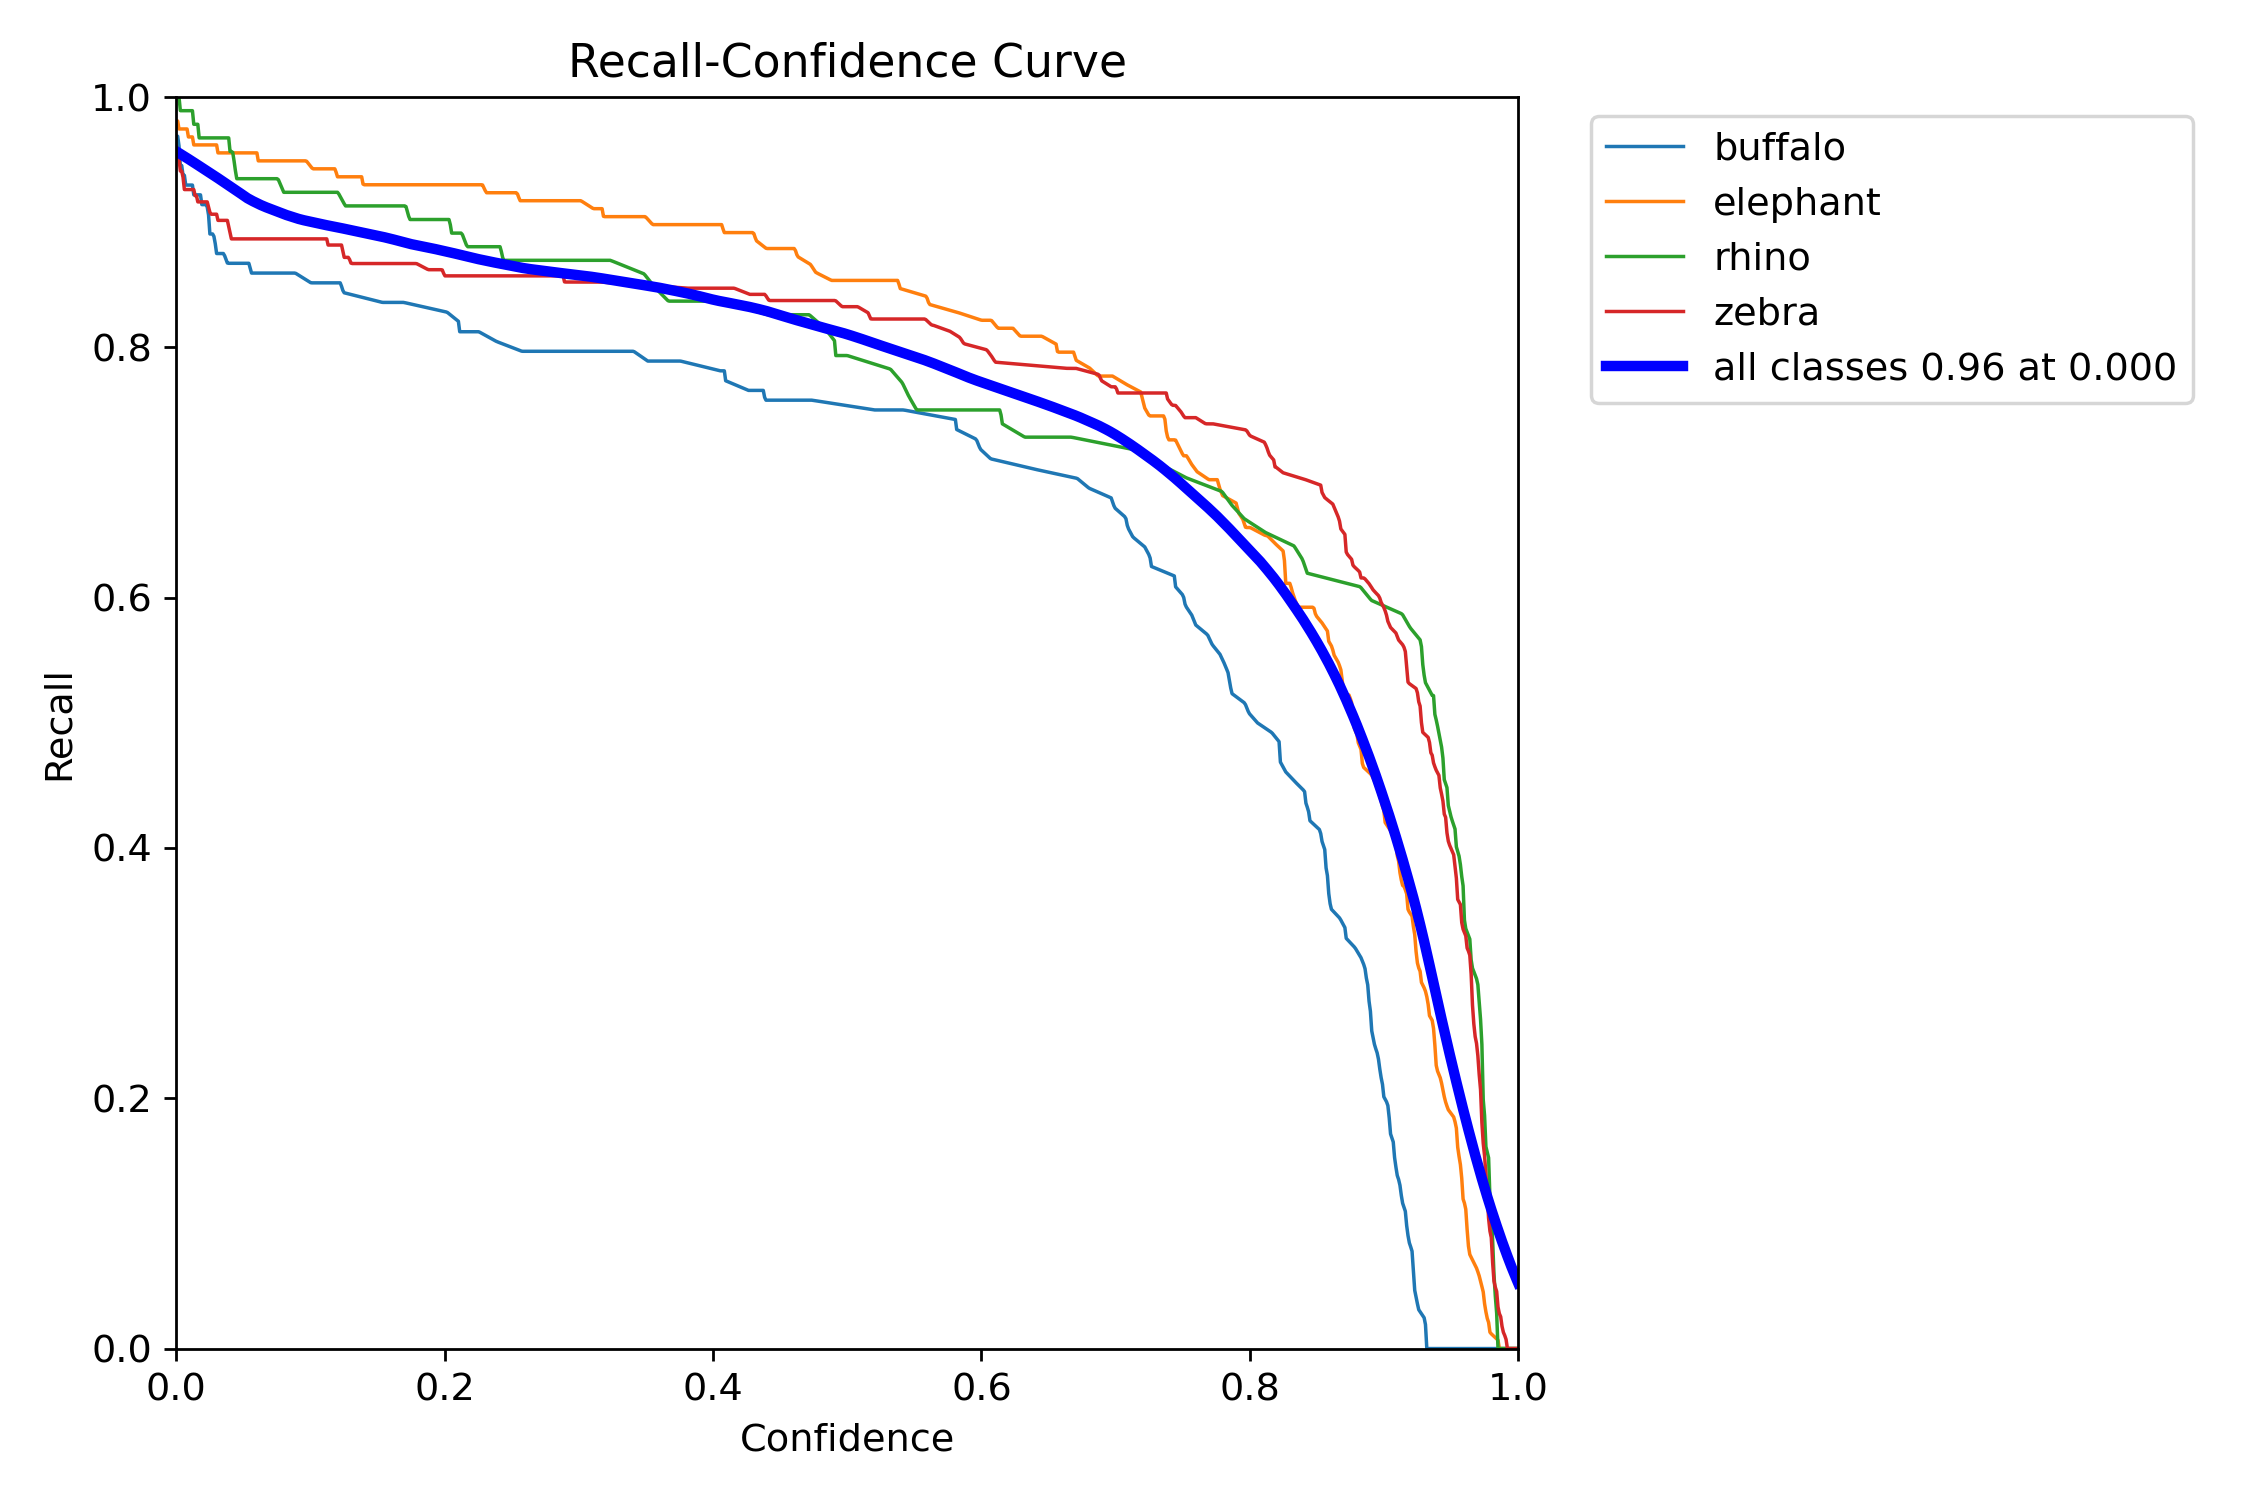

None


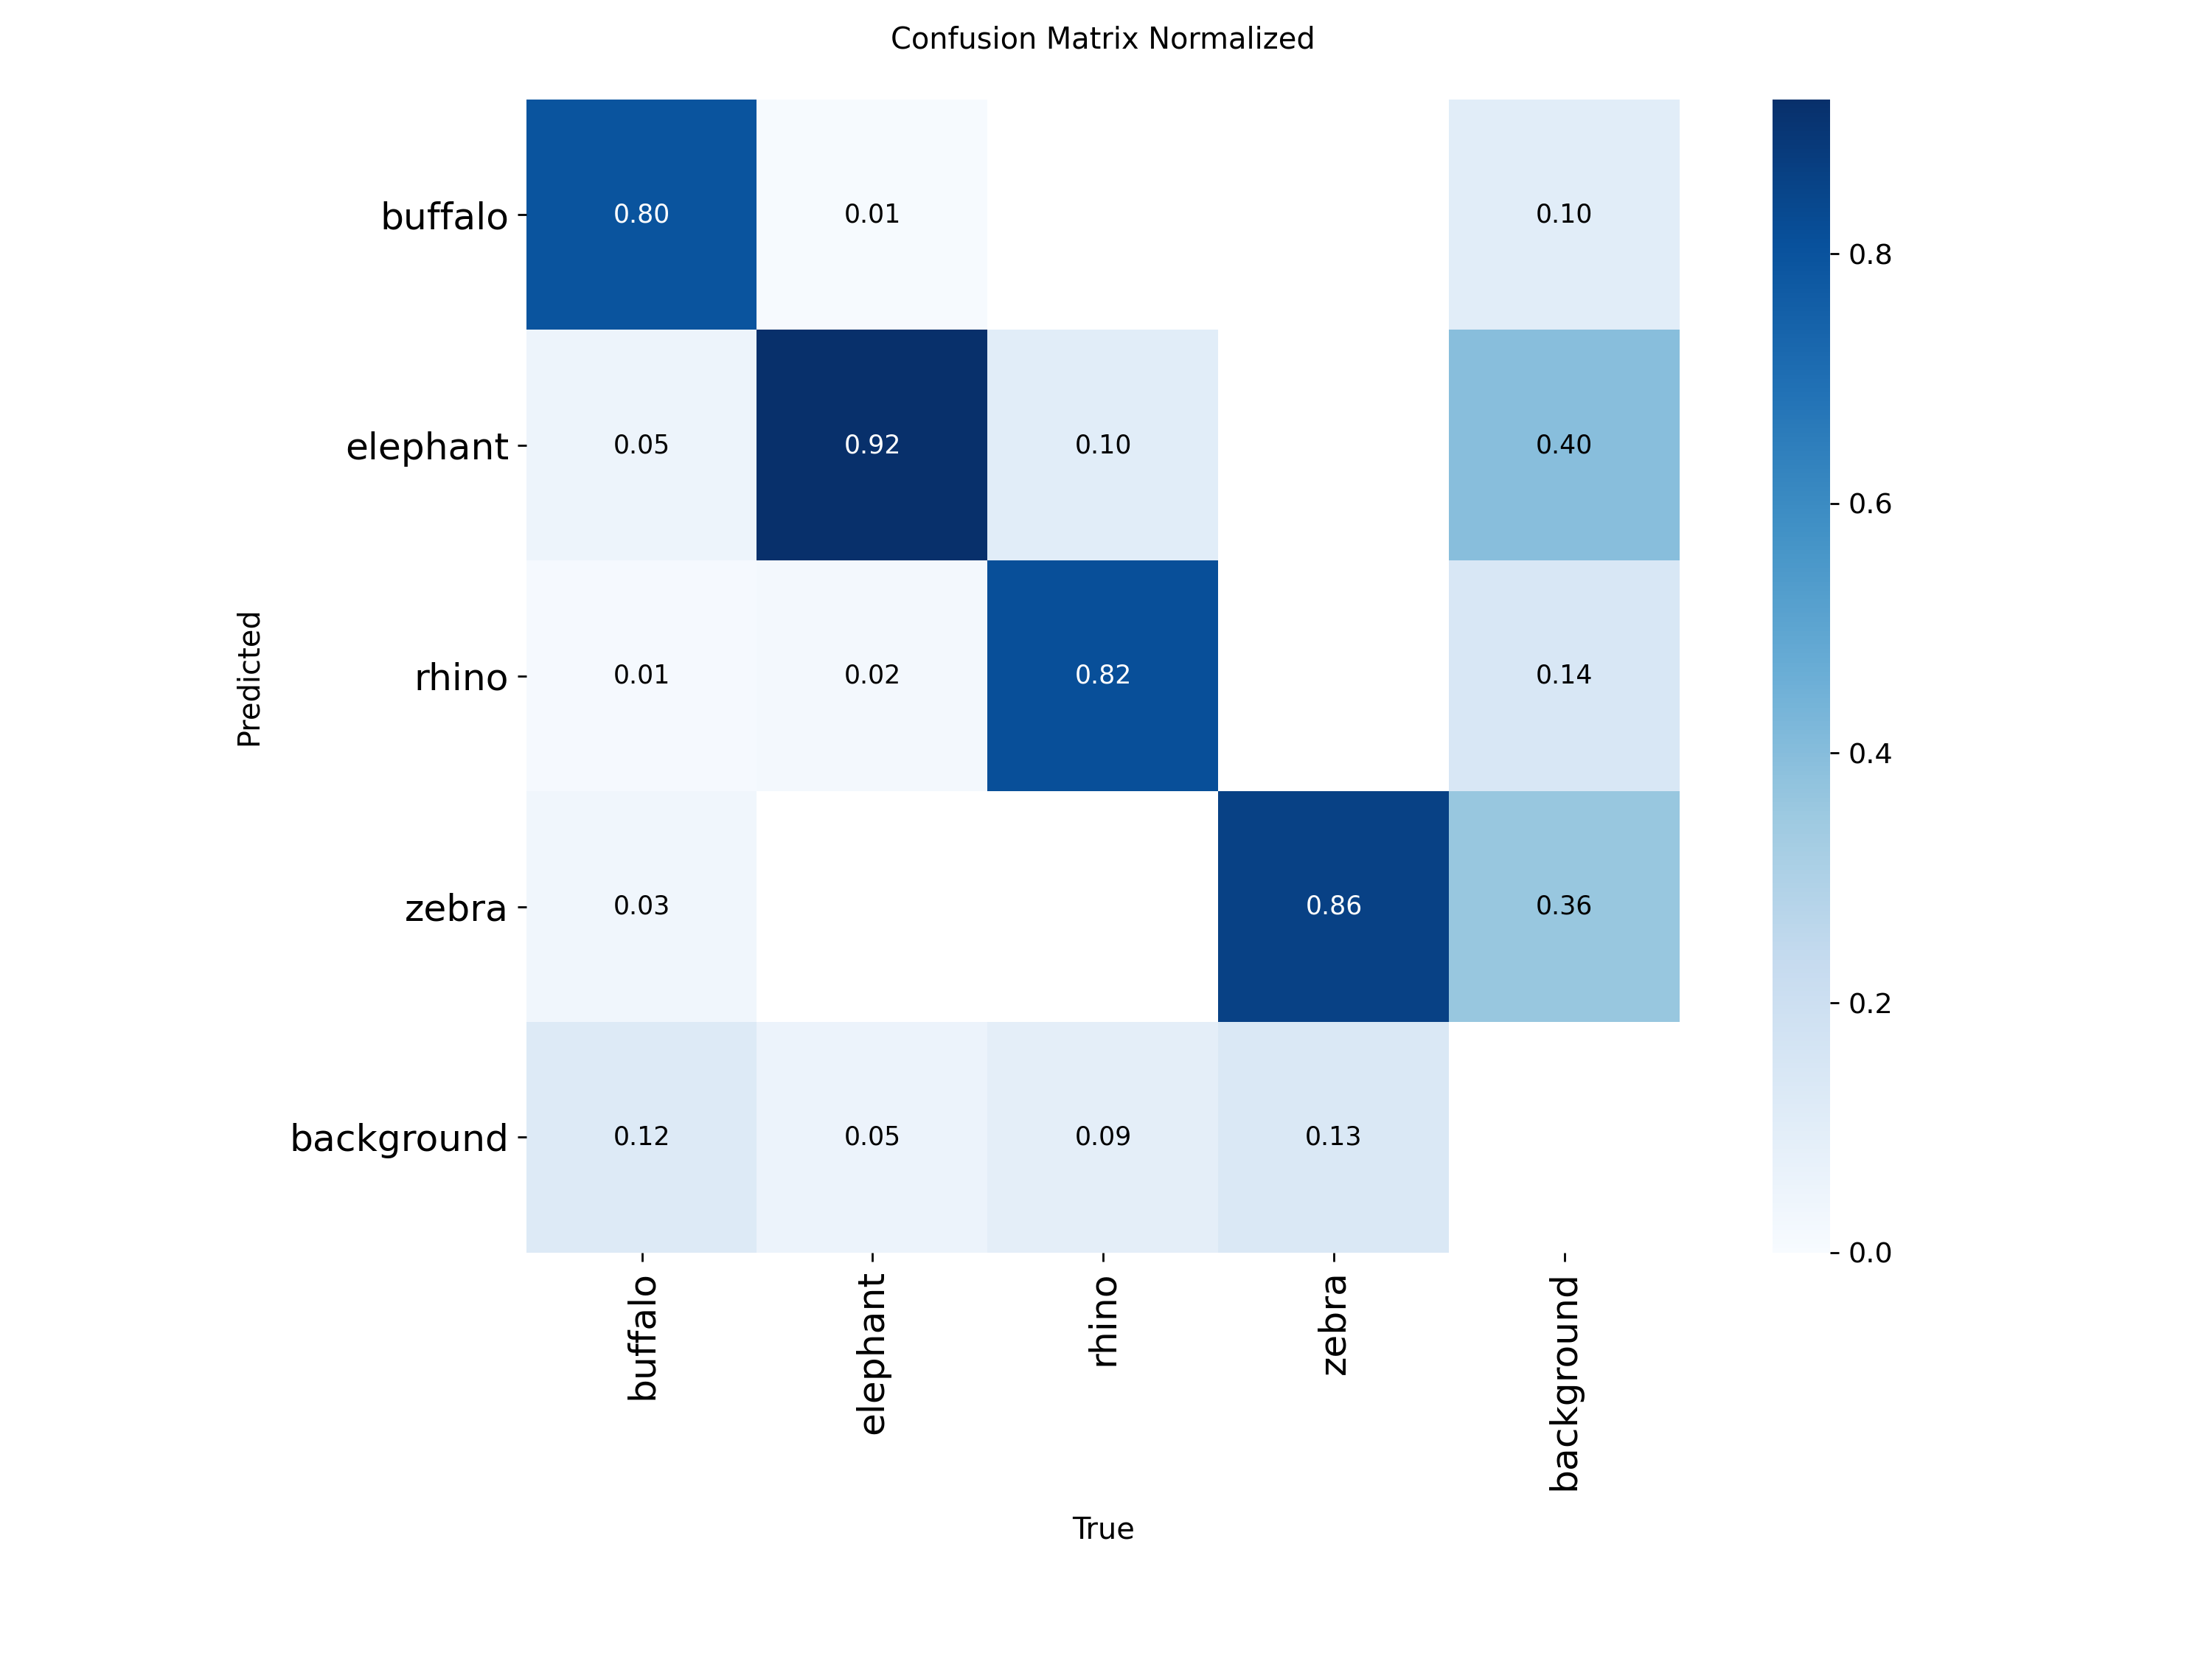

None


In [37]:
for i in glob.glob("/kaggle/working/runs/detect/train2/*.png"):
    print(display(Image(i)))

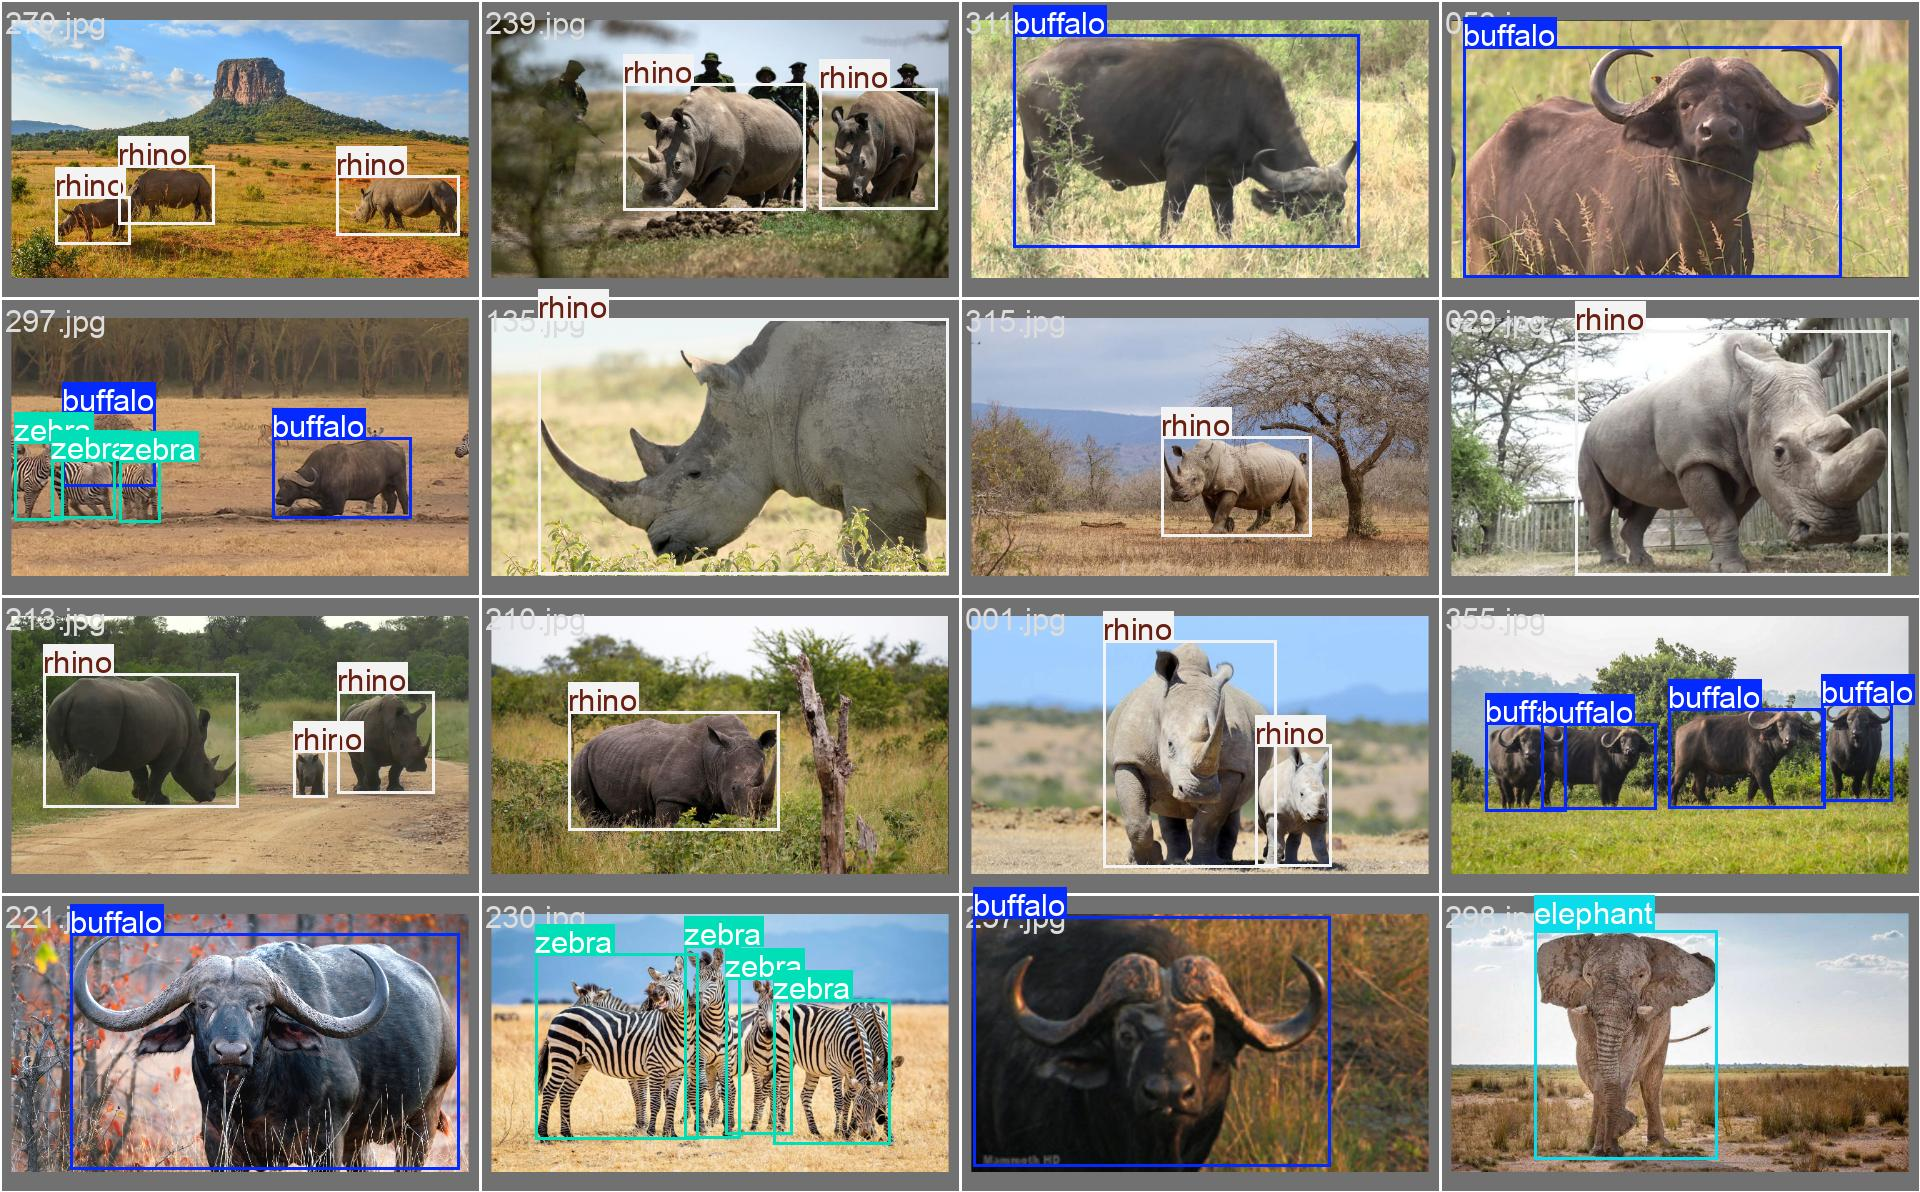

None


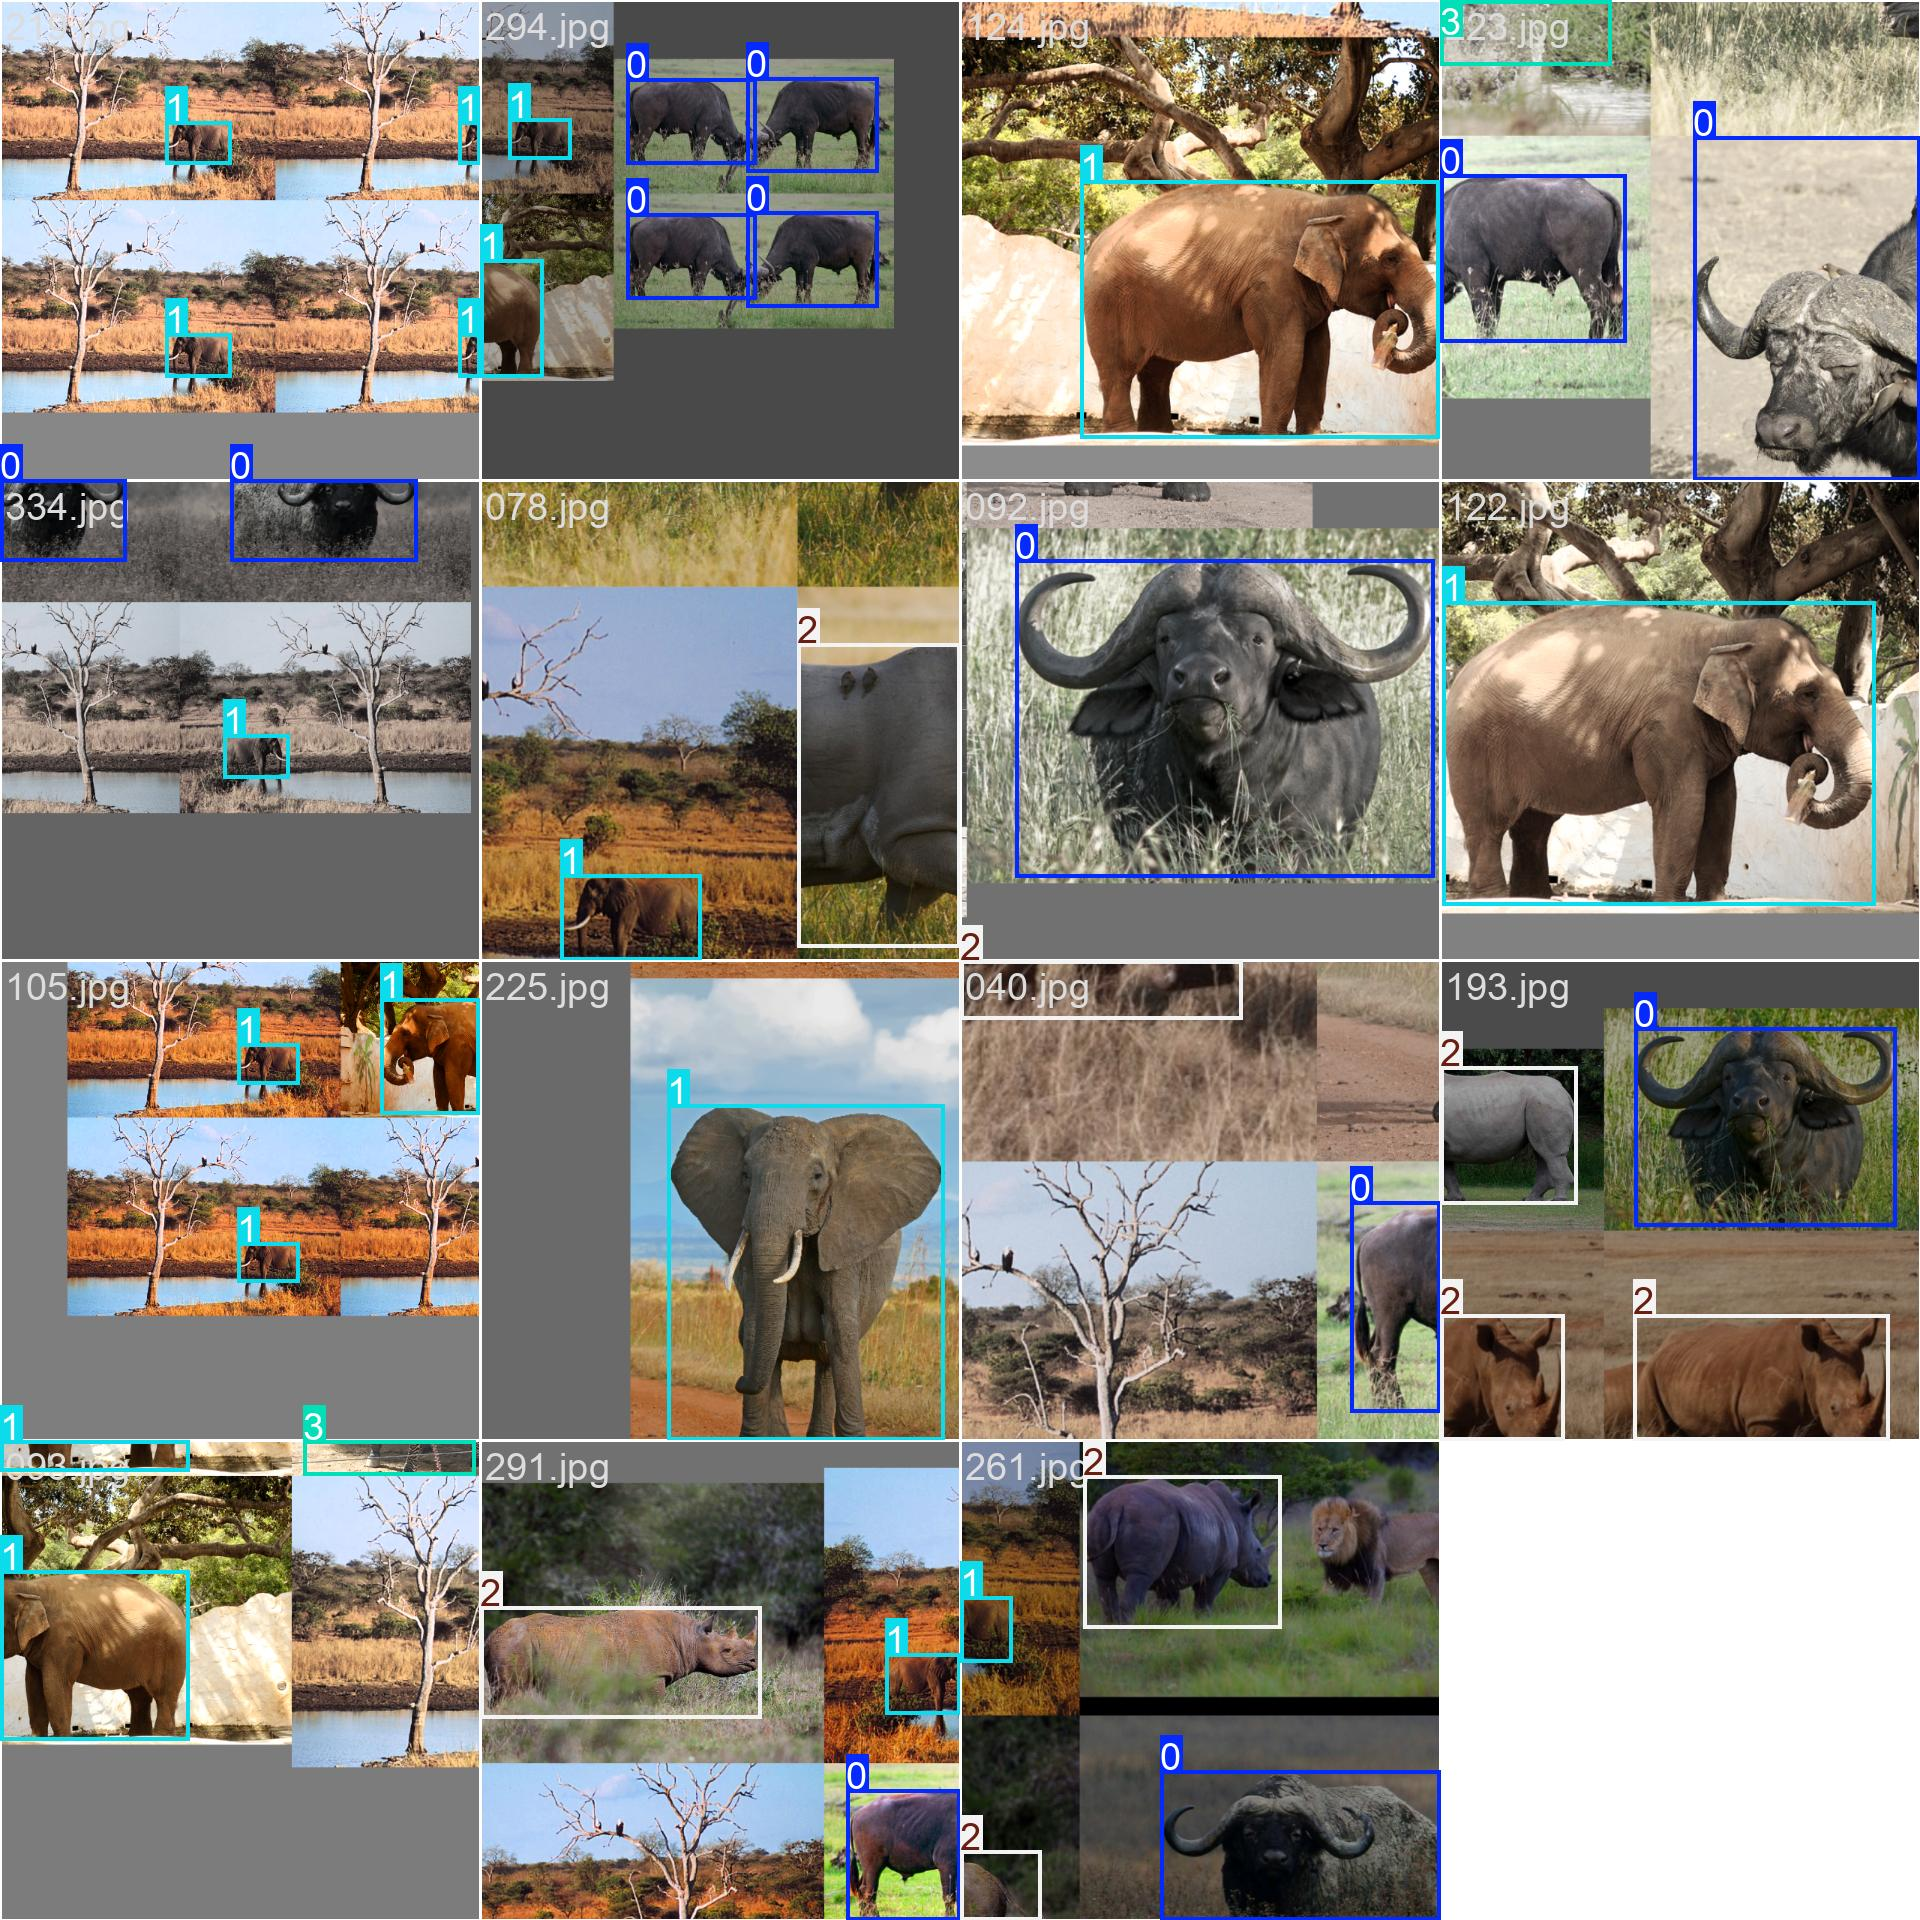

None


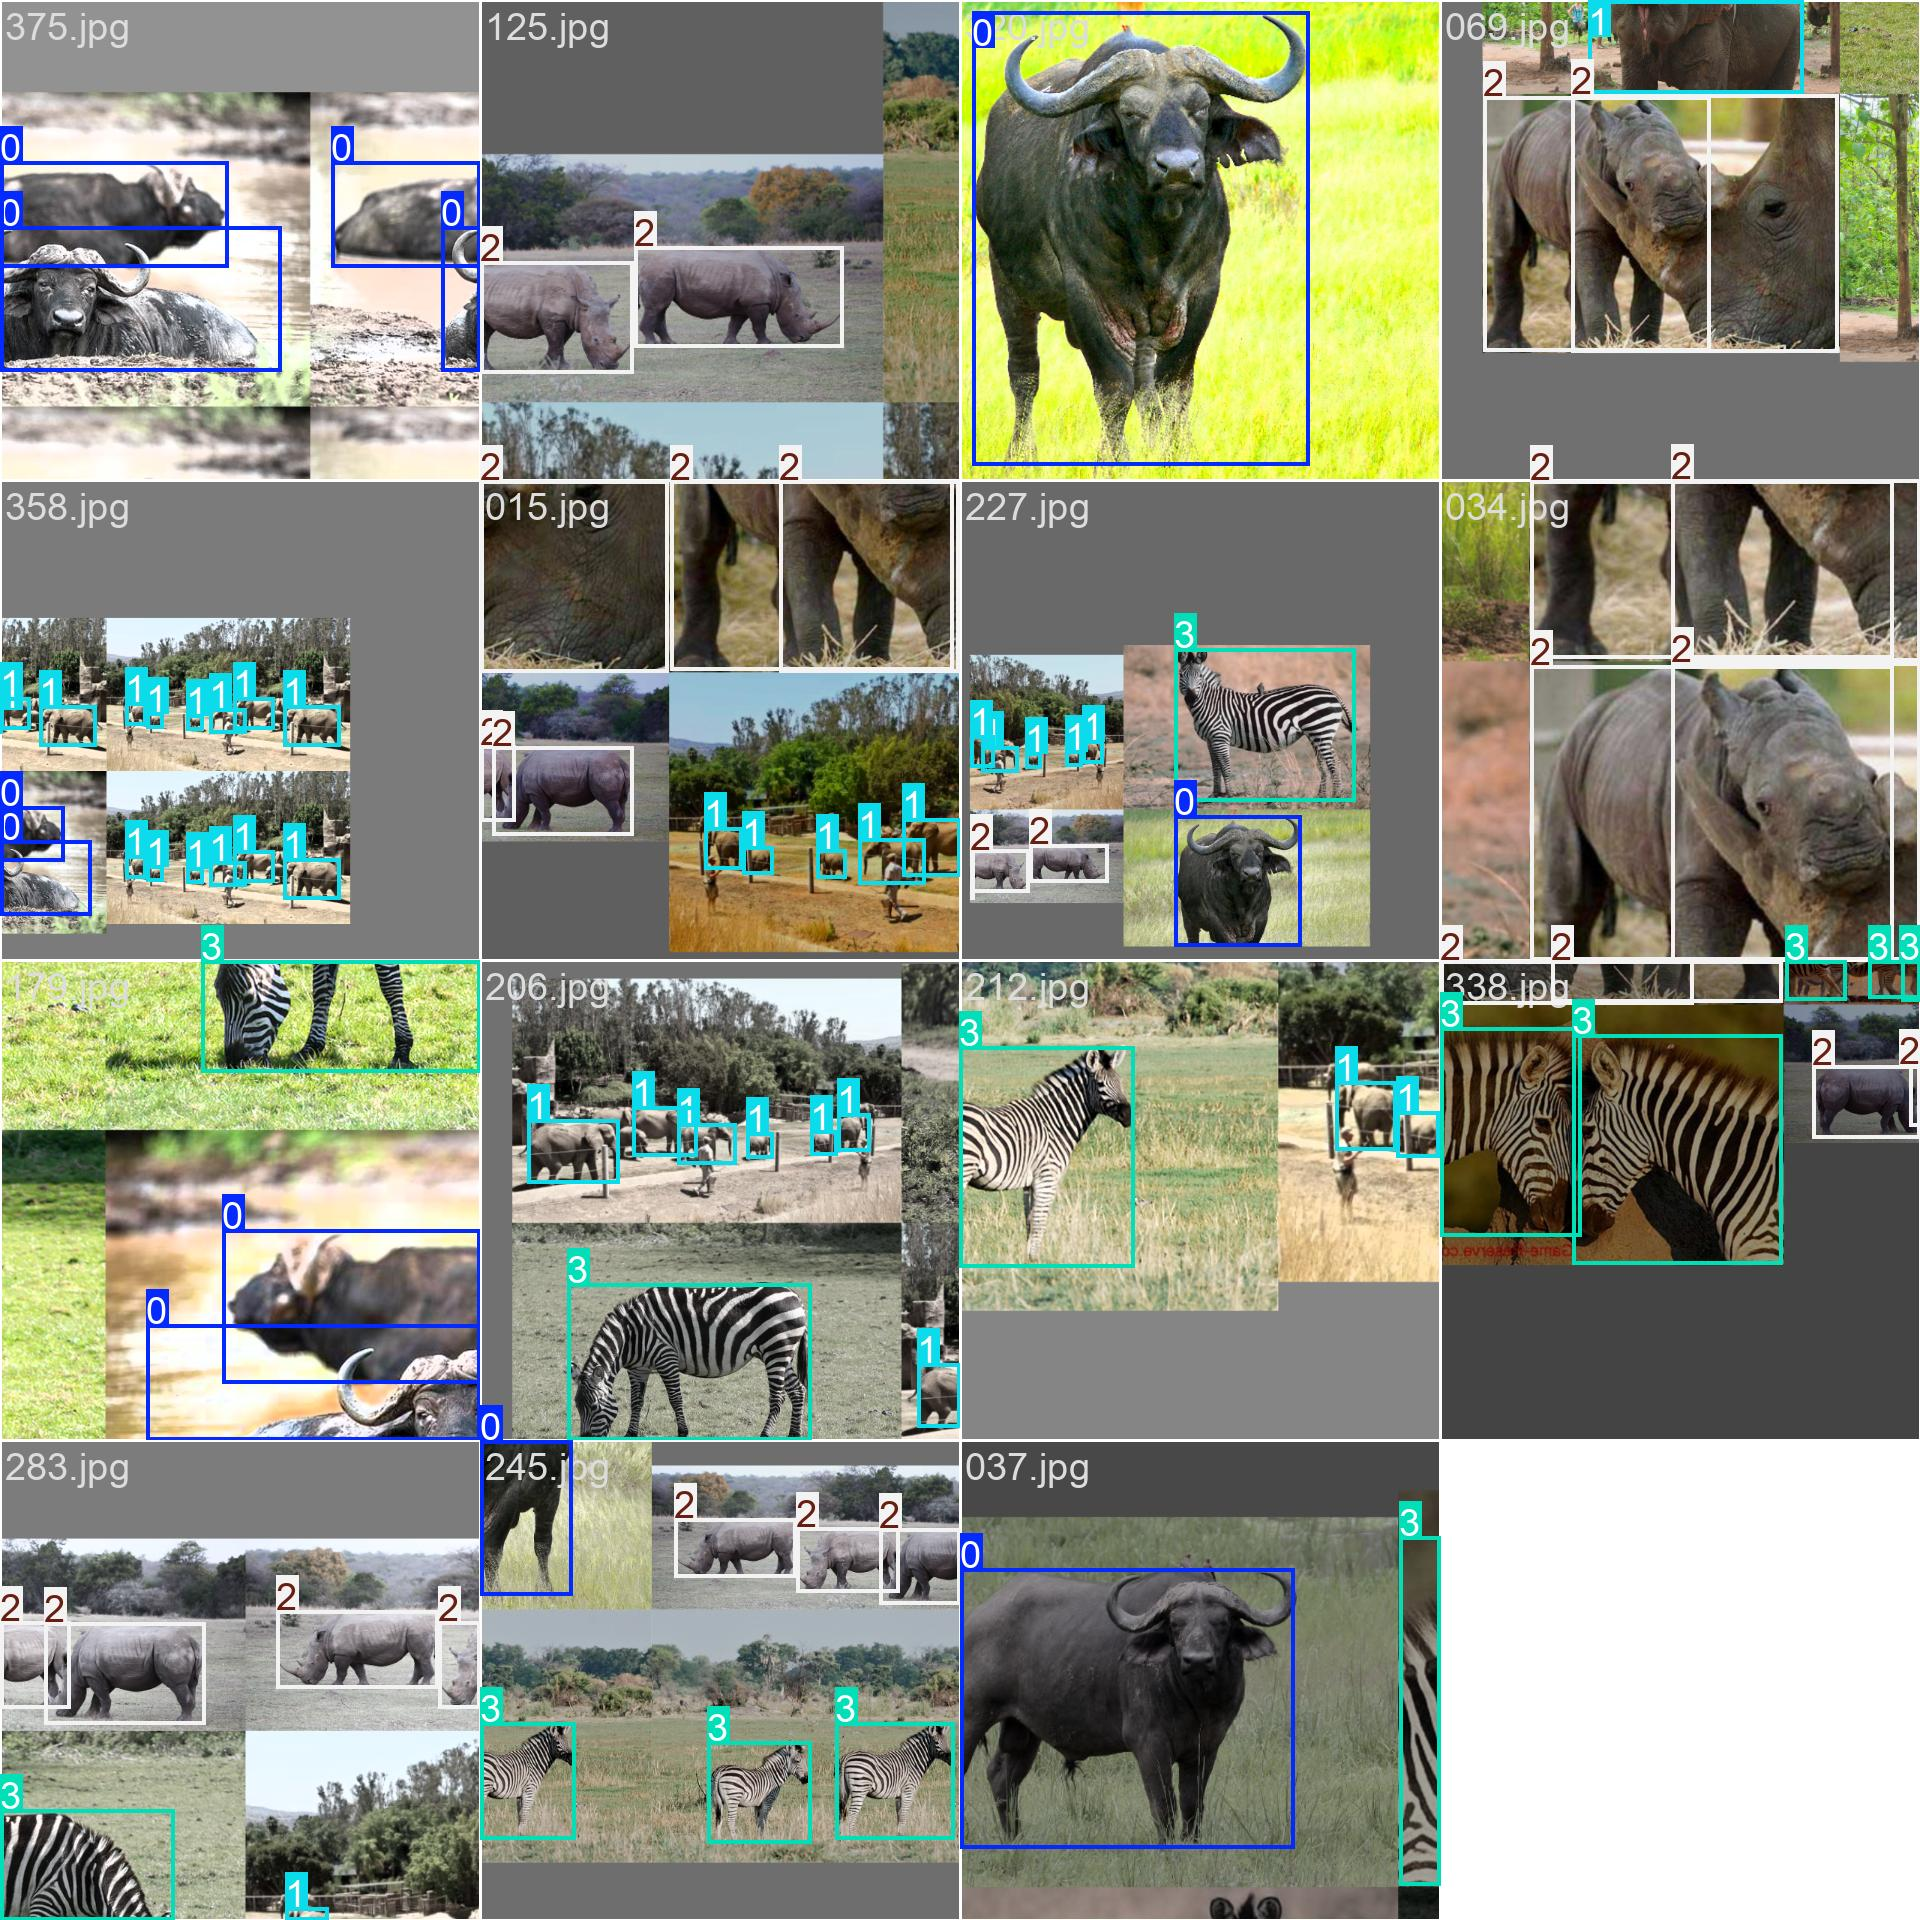

None


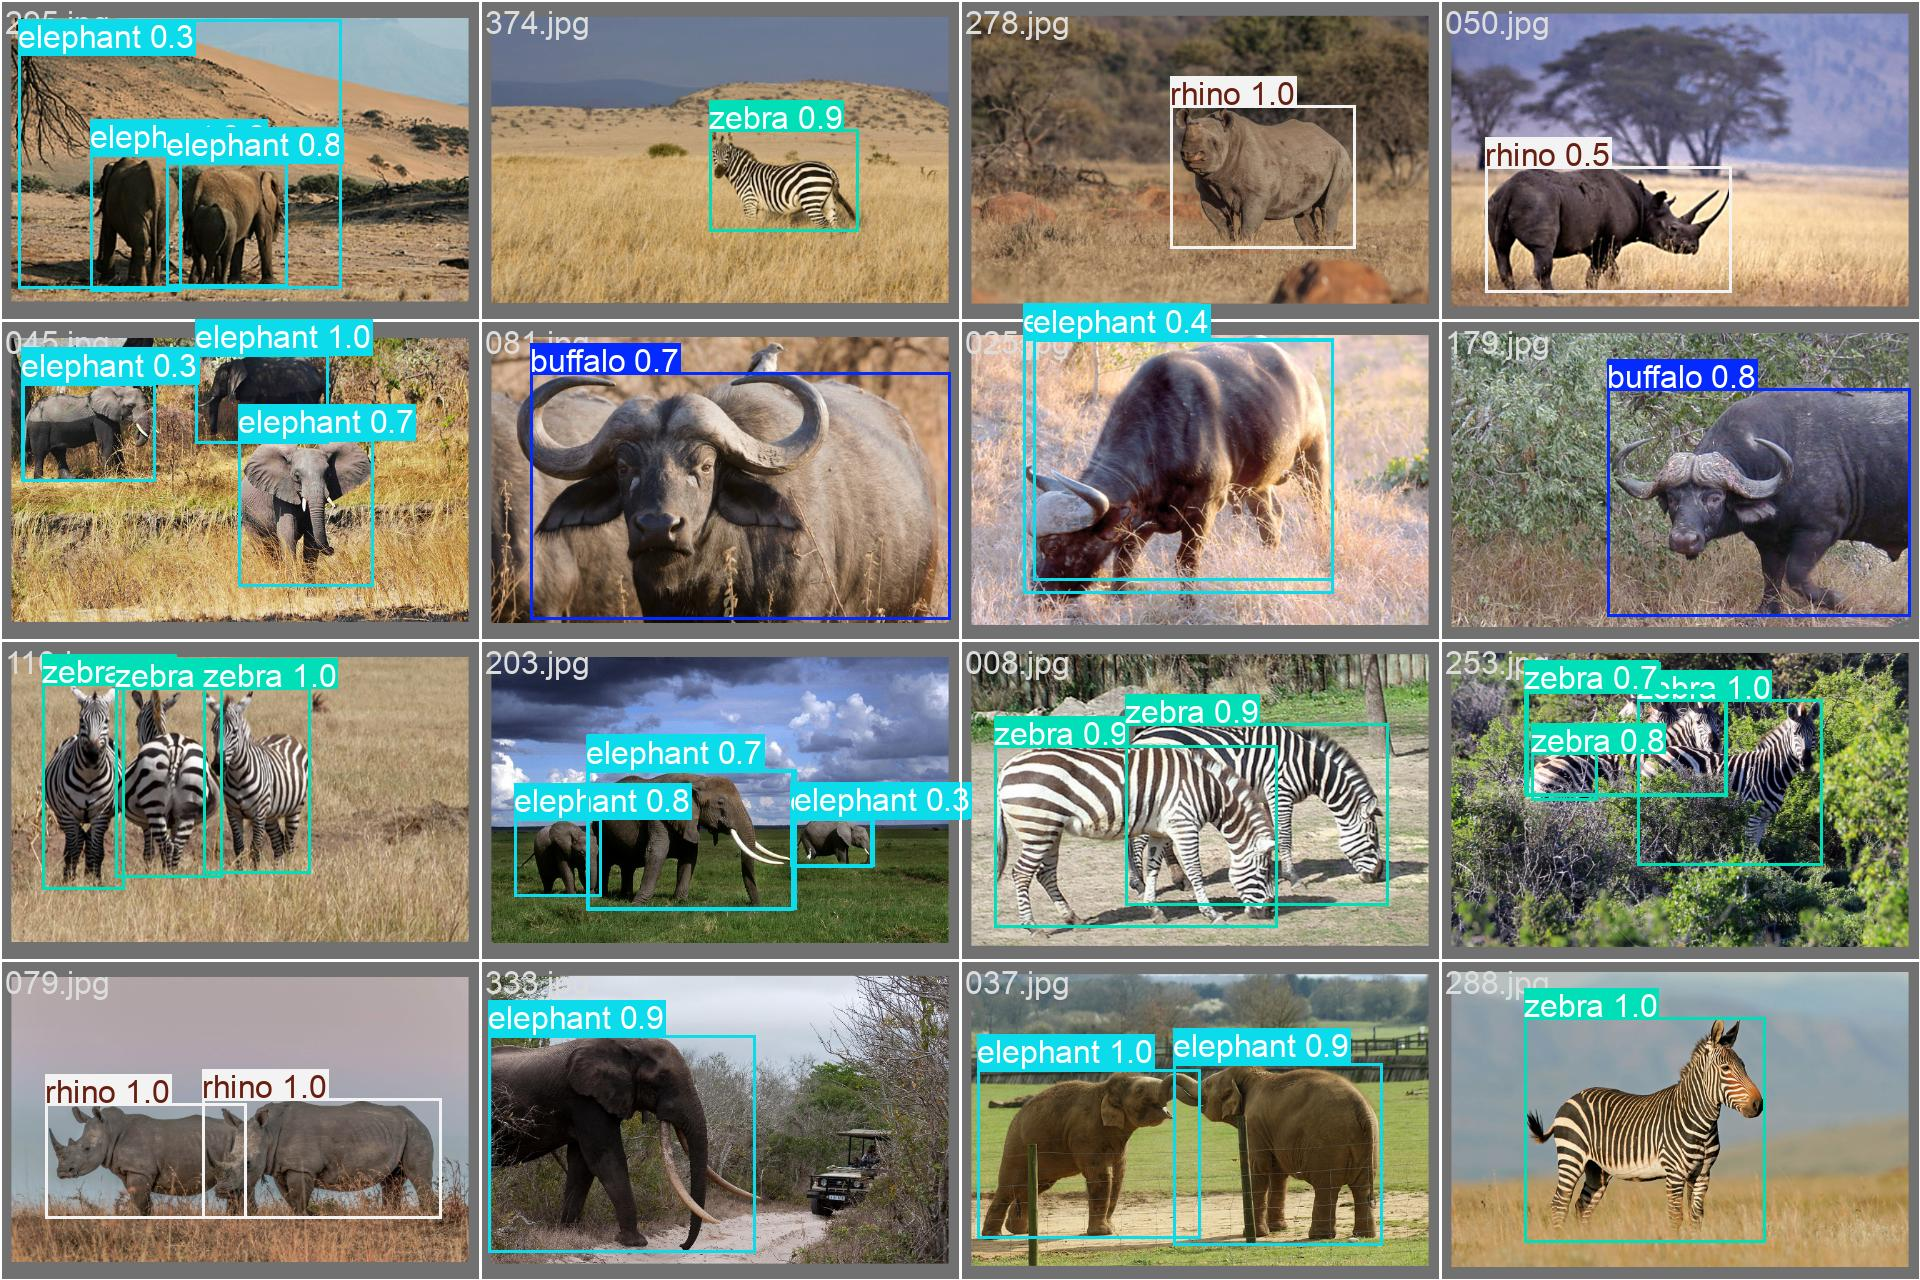

None


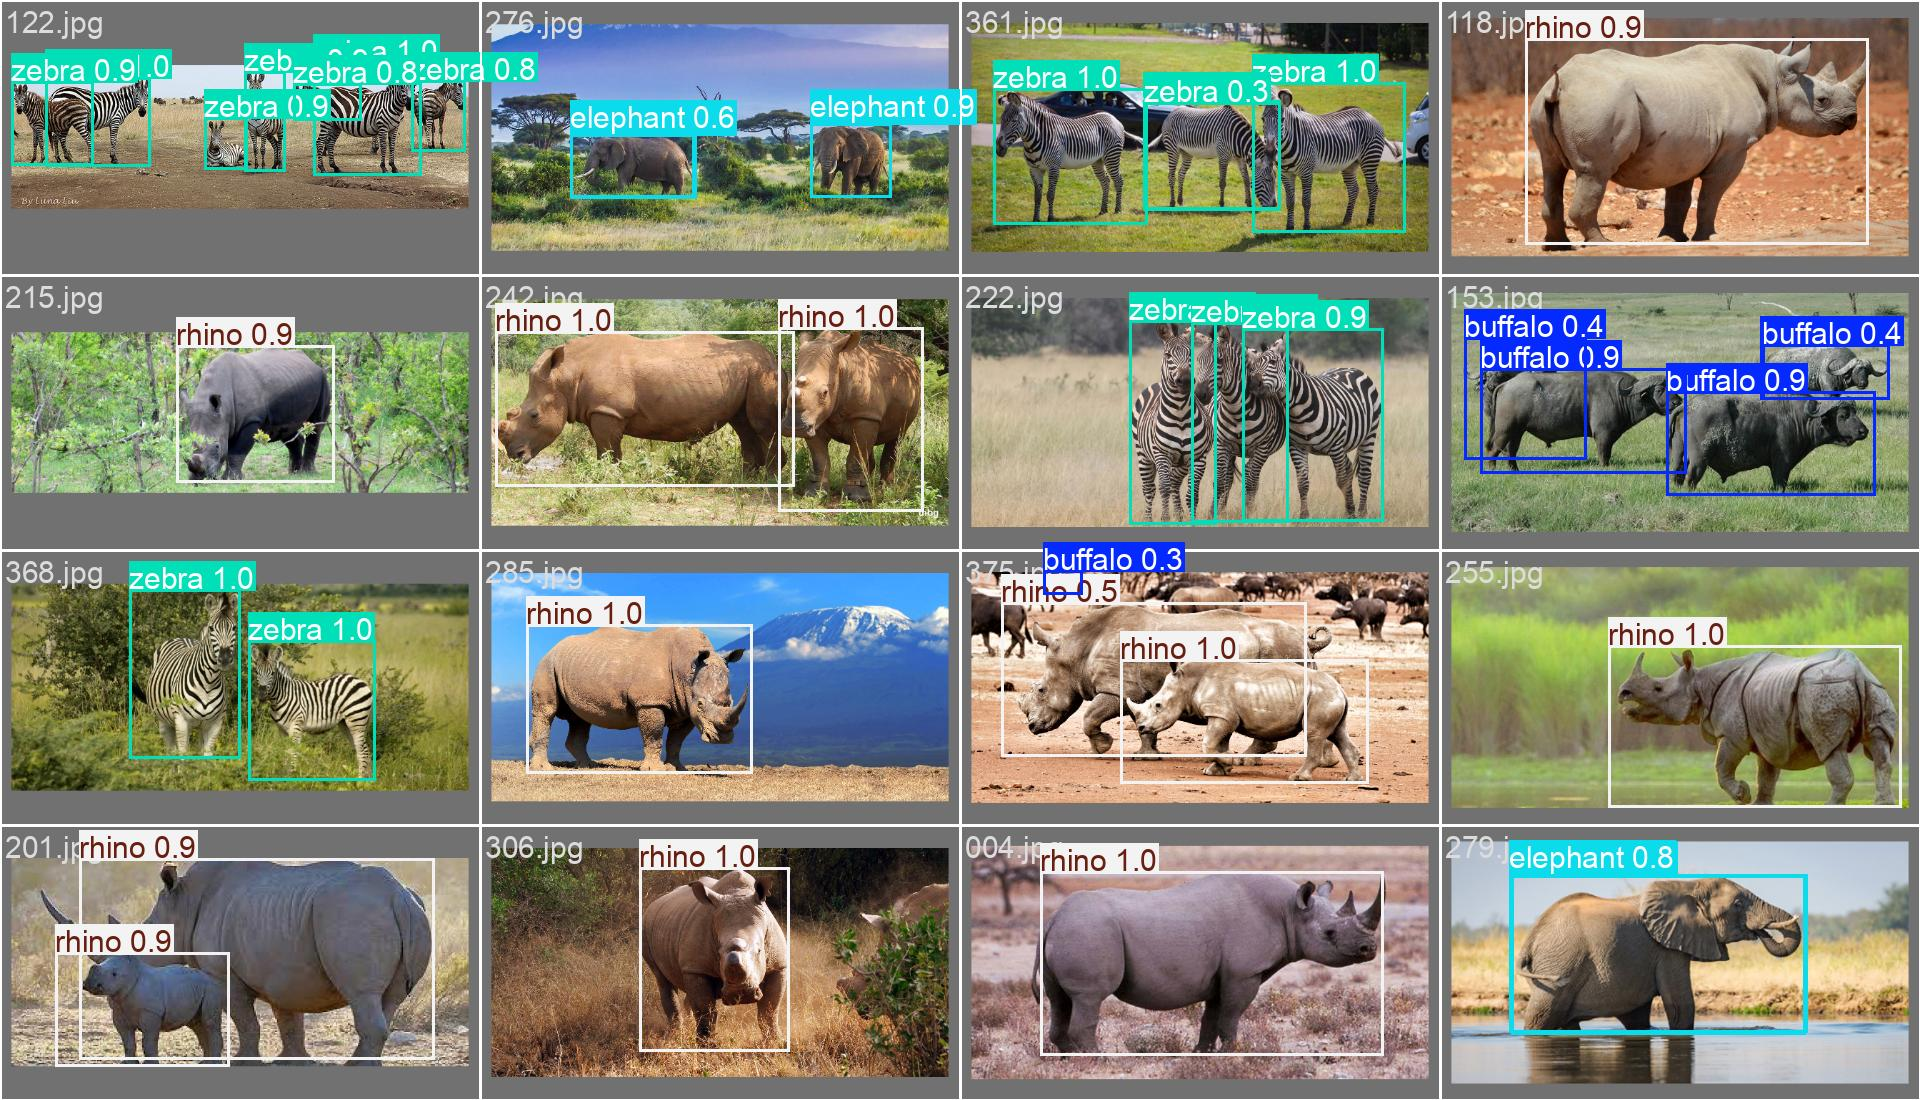

None


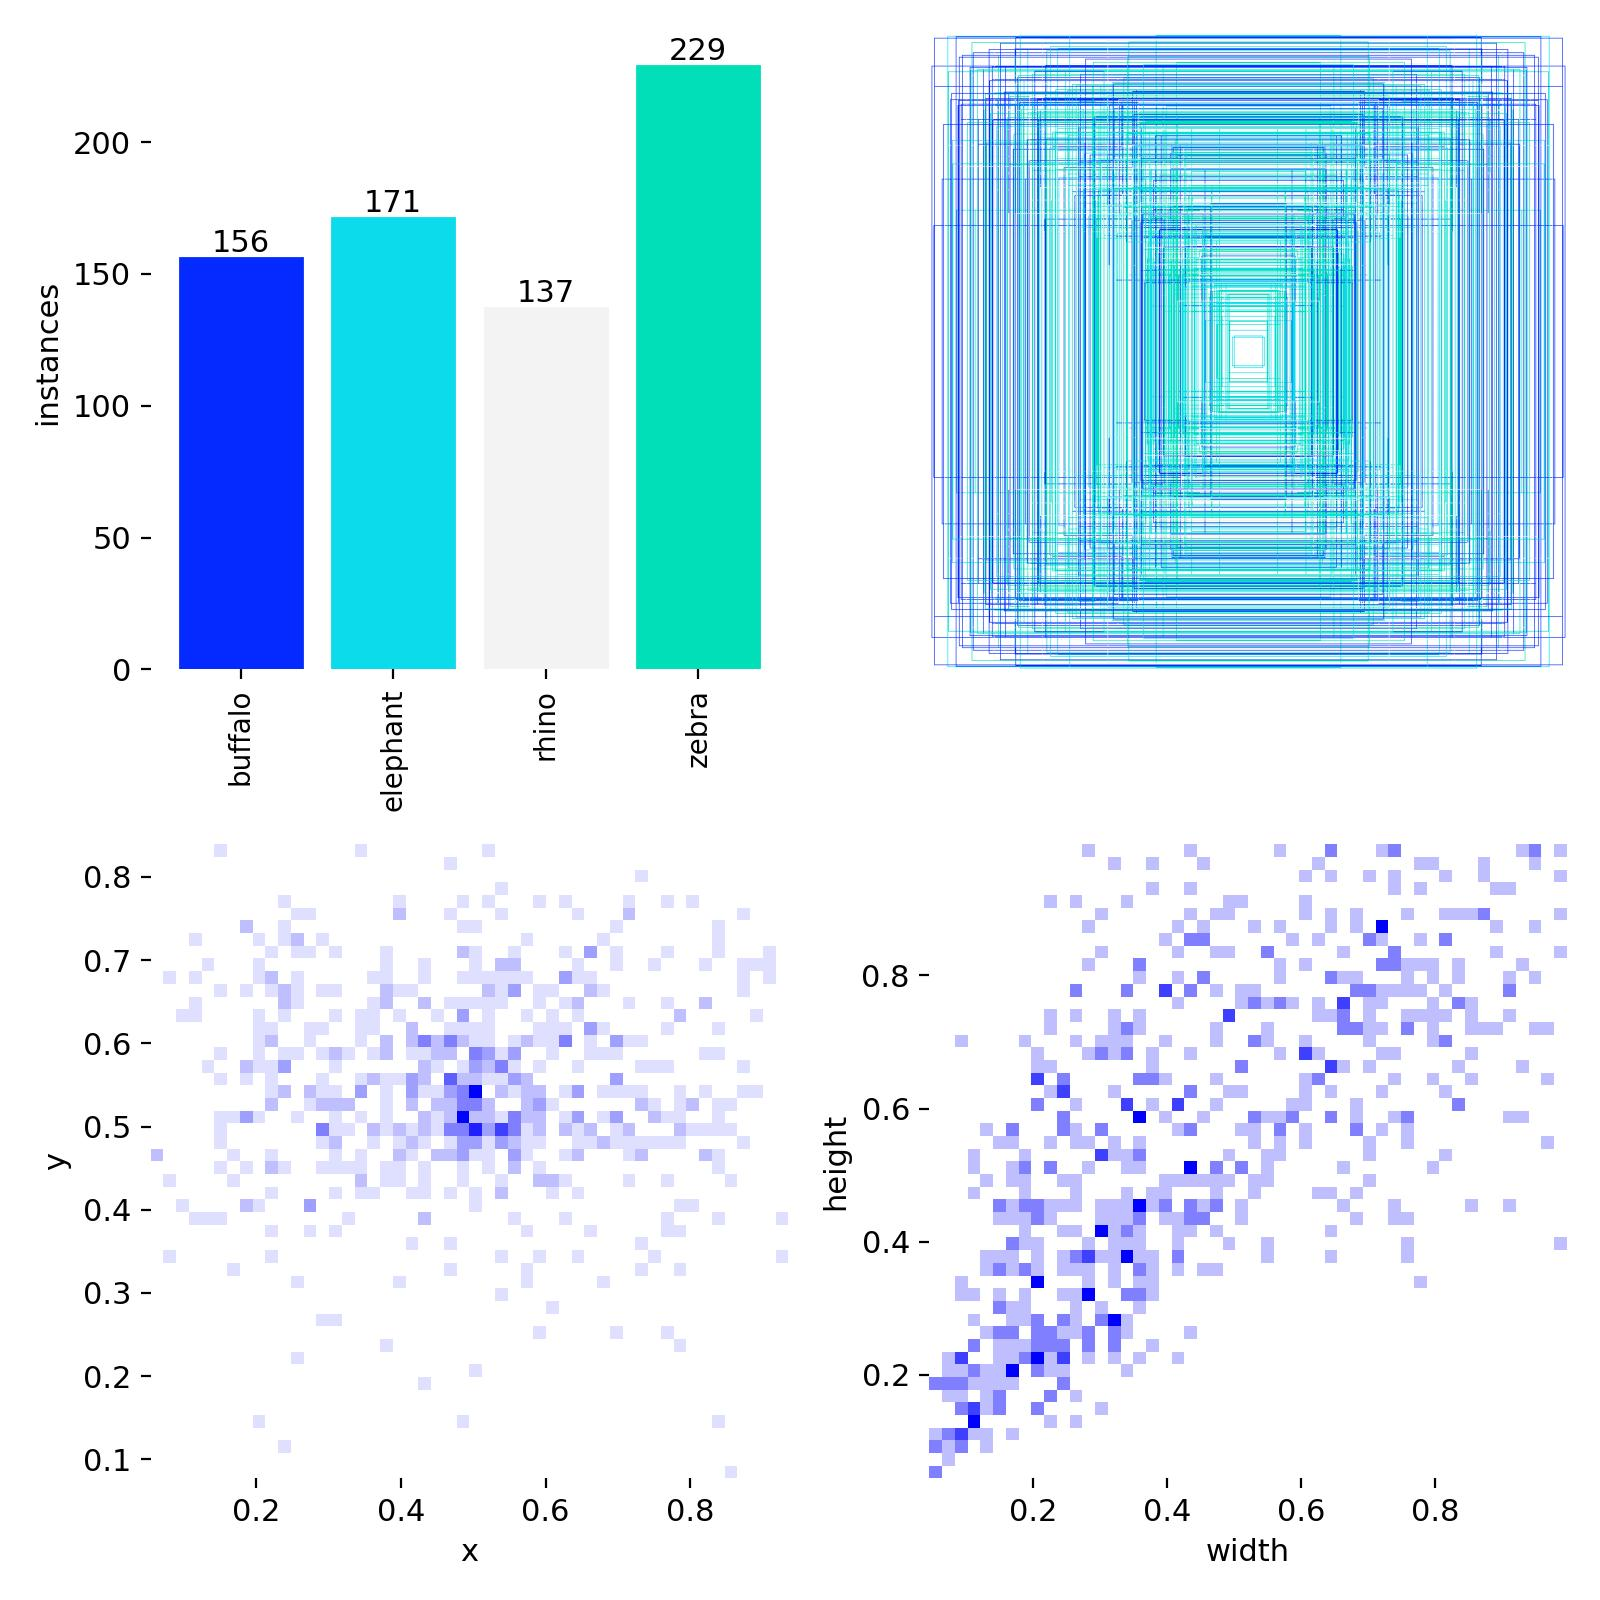

None


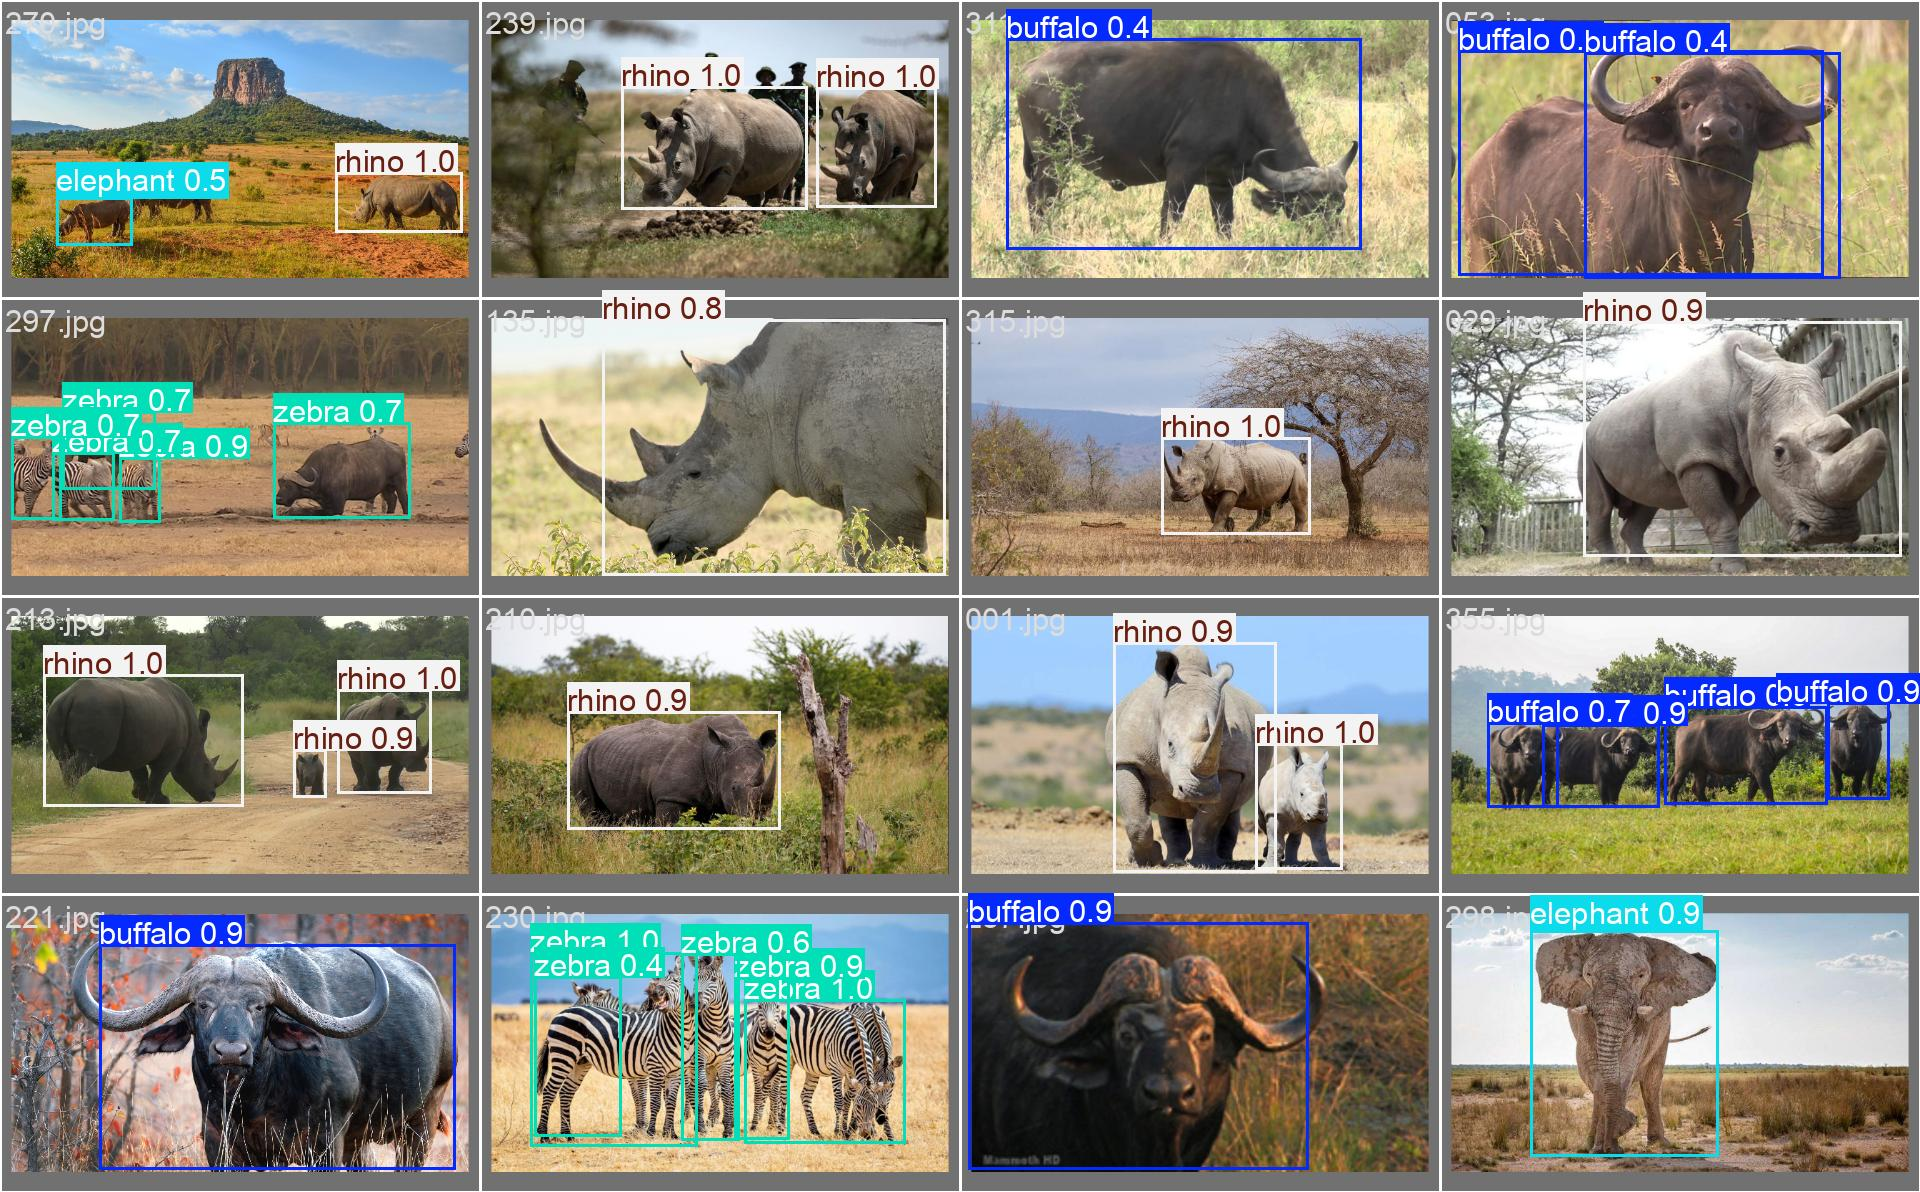

None


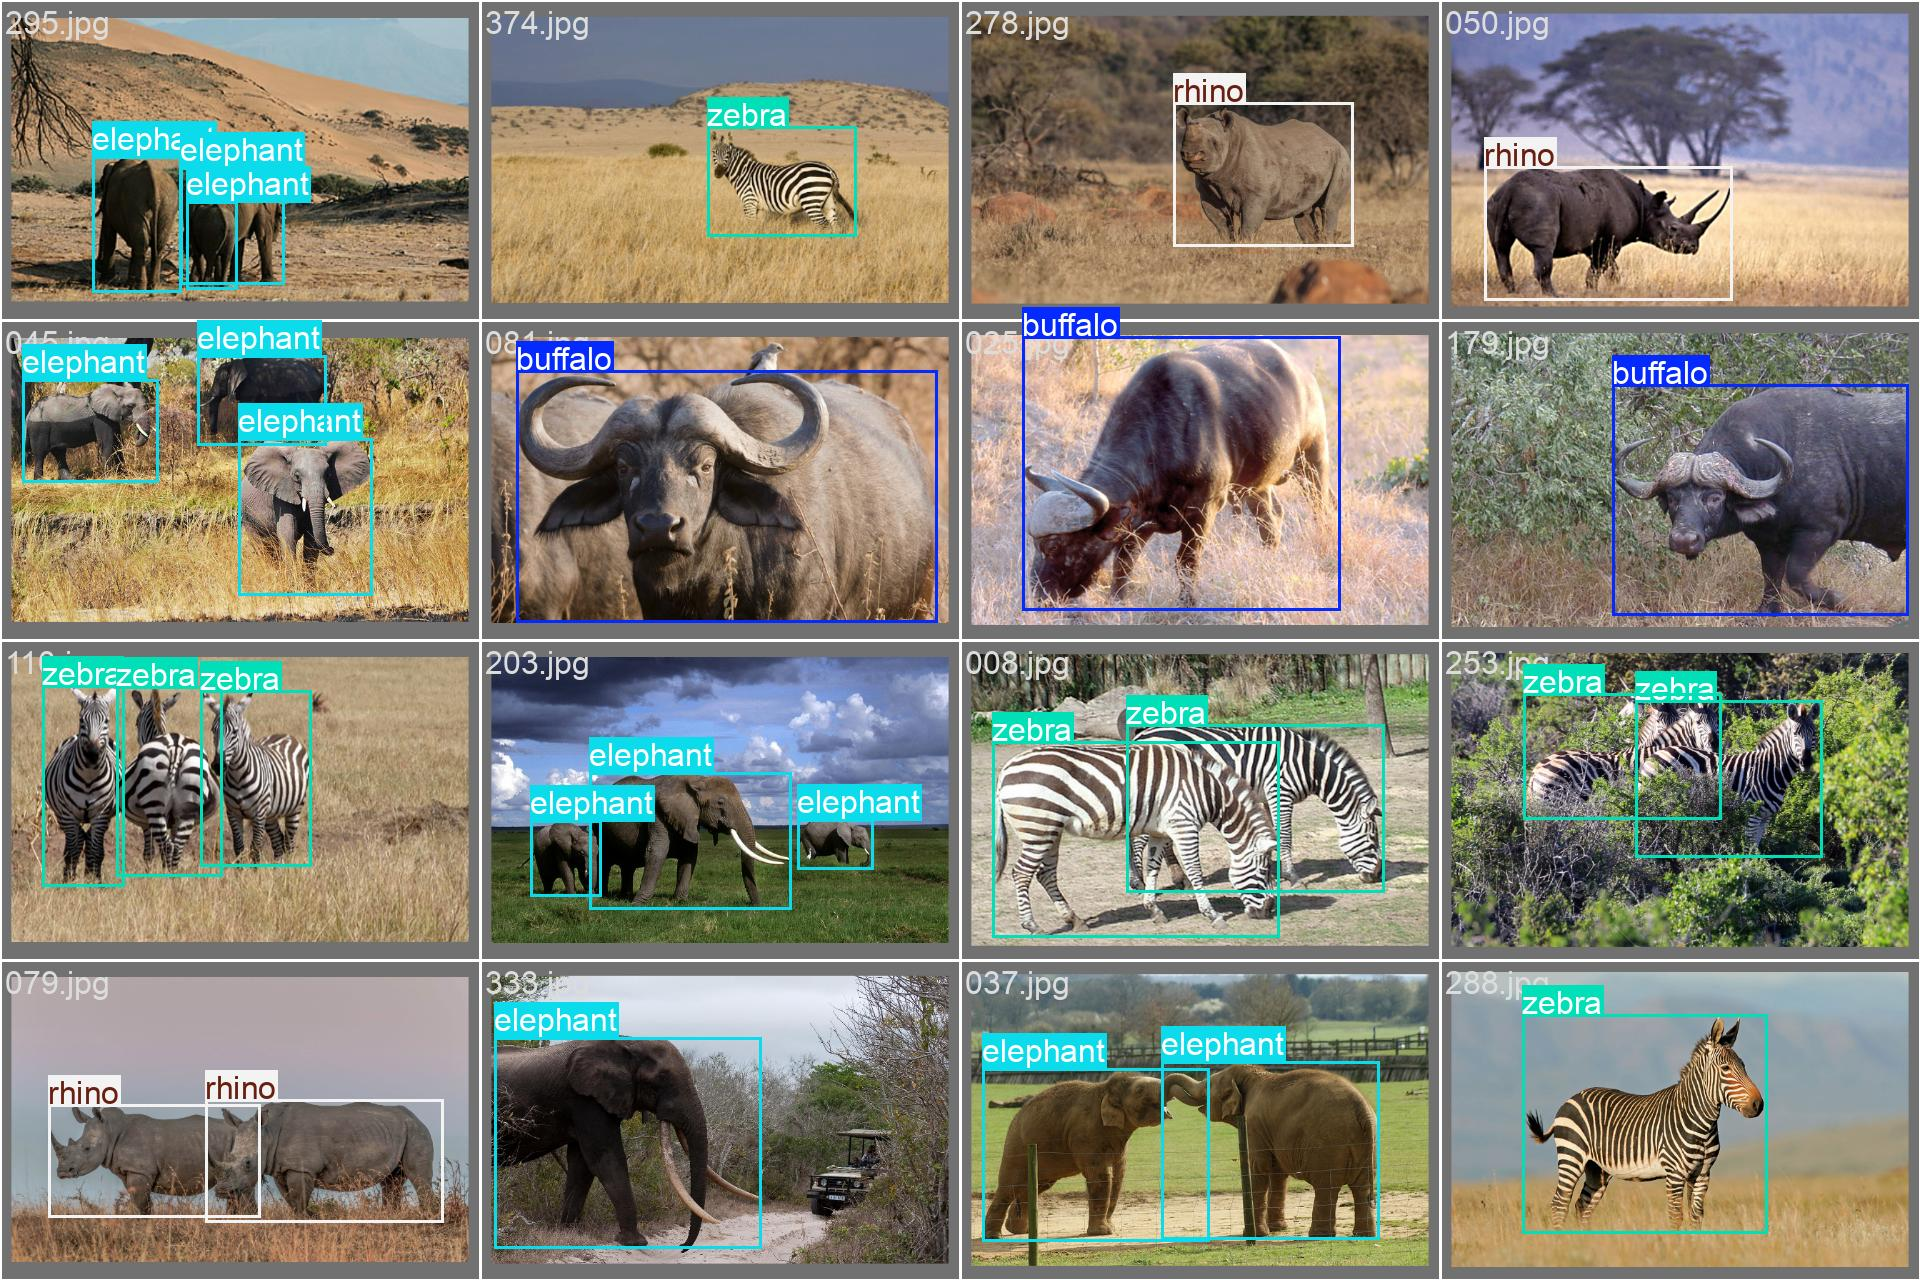

None


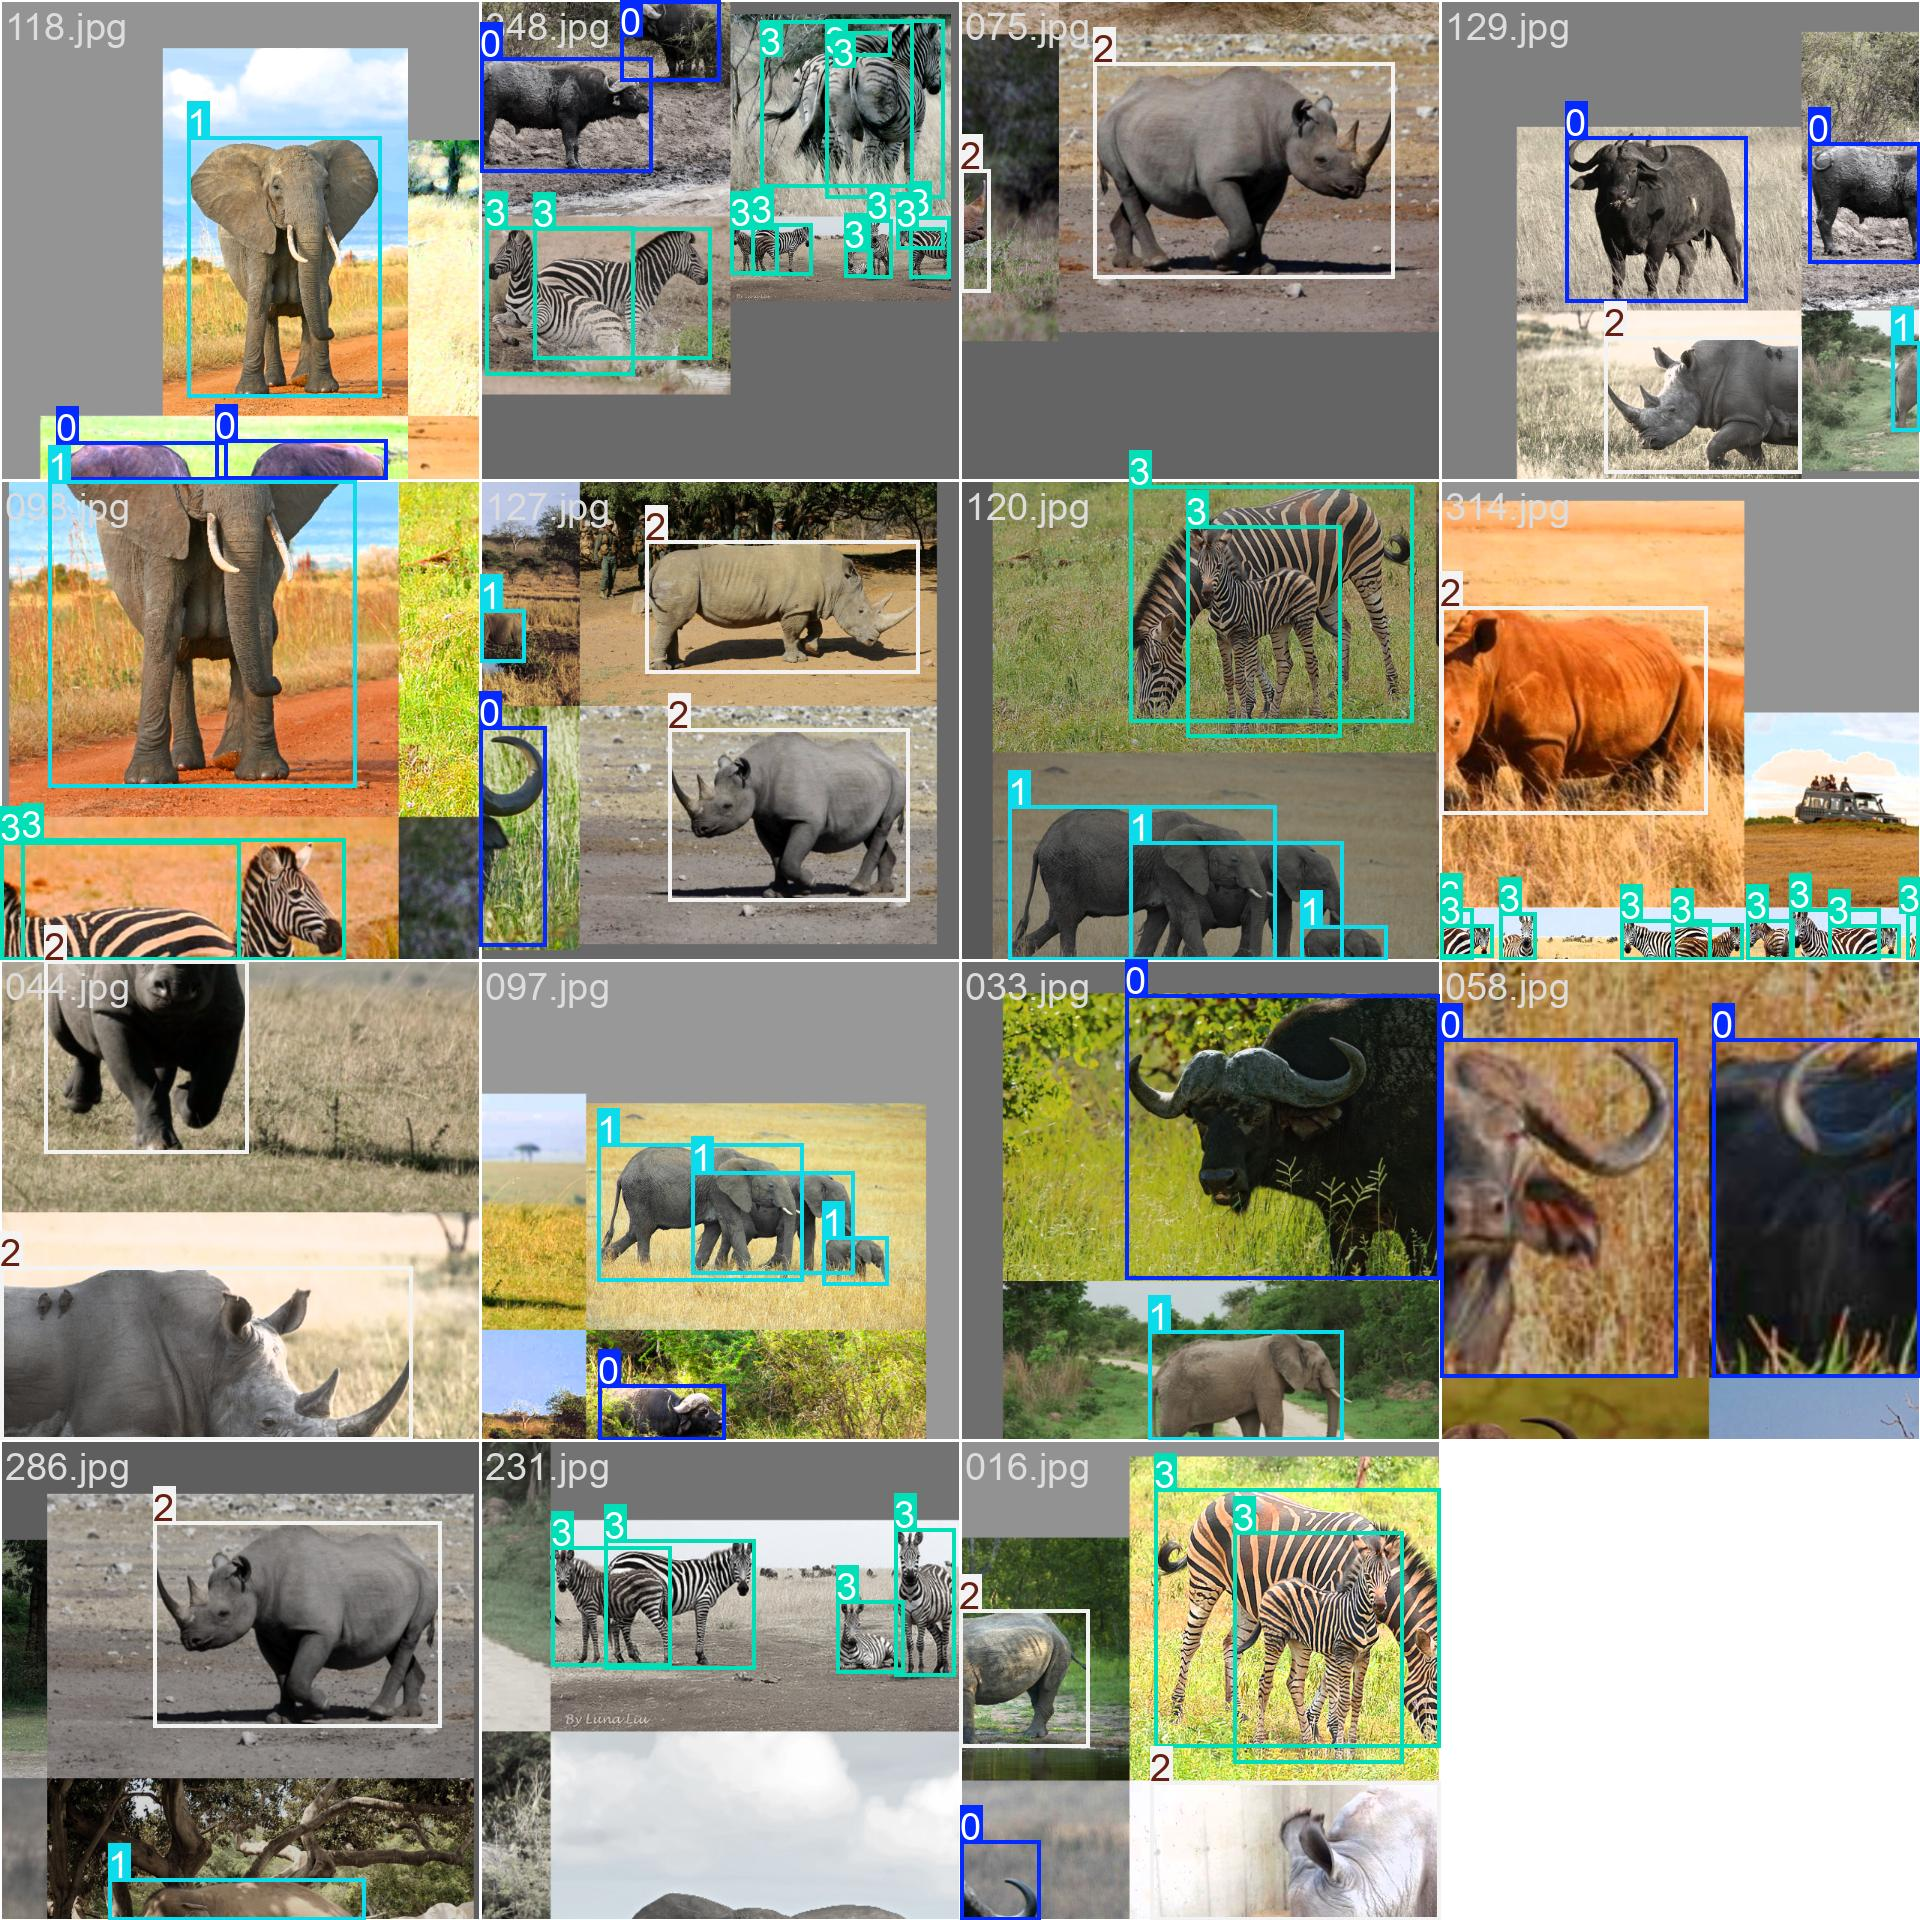

None


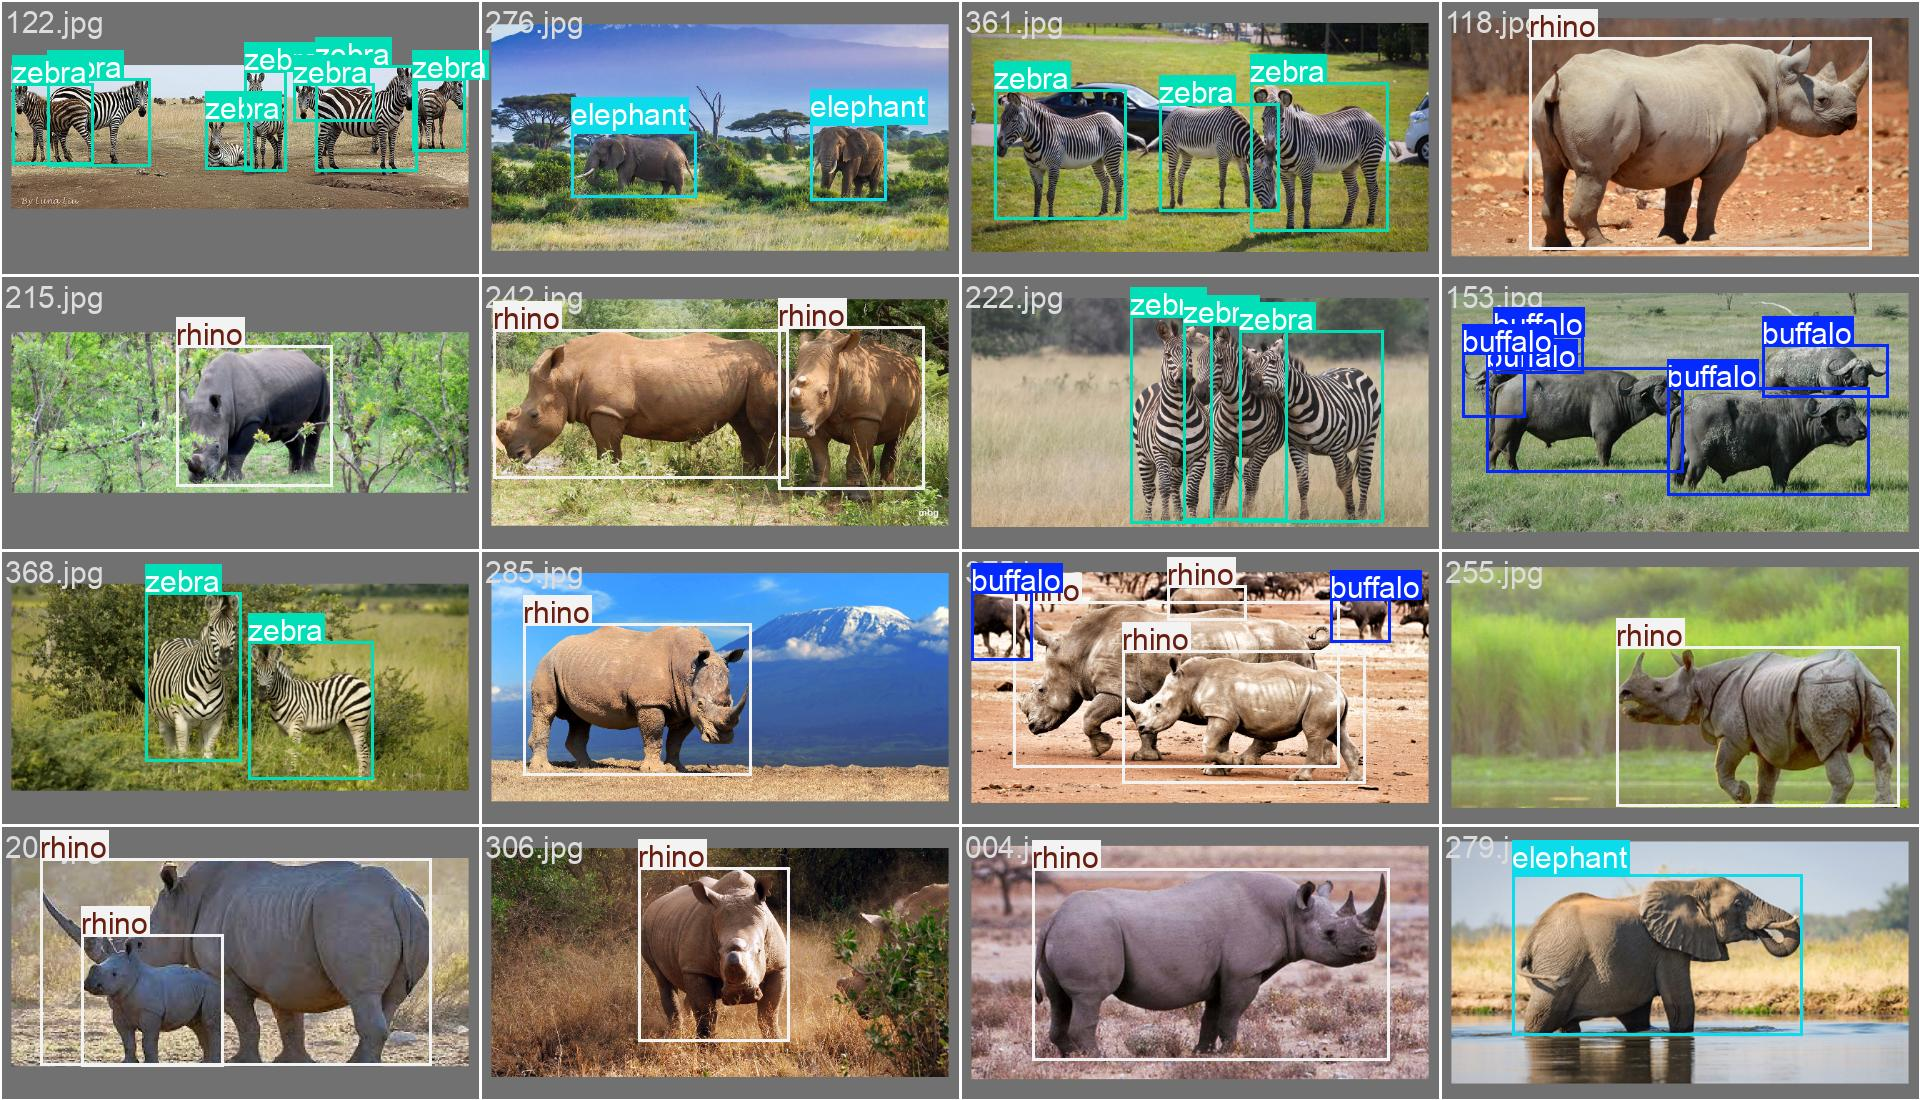

None


In [38]:
for i in glob.glob("/kaggle/working/runs/detect/train2/*.jpg"):
    print(display(Image(i)))